In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import copy
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import os
import plotly.express as px
from matplotlib import cm
import matplotlib as mpl
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
import matplotlib as mpl
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy
import random
import sklearn
import xarray as xr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import gaussian_kde
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from sklearn import tree
from sklearn.model_selection import cross_validate
import geopandas as gpd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from pathos.threading import ThreadPool as Pool
from sklearn import datasets, linear_model
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
work_dir=Path("/mnt/u/LSM root zone/global_sr")
out_dir=Path("/mnt/u/LSM root zone/global_sr/output")
fig_dir=Path('/mnt/c/Users/fransjevanoors/surfdrive - Fransje van Oorschot@surfdrive.surf.nl/Fransje/global_SR/global_sr_paper/figures')

In [3]:
def cmap_map(function, cmap):
    """ Applies function (which should operate on vectors of shape 3: [r, g, b]), on colormap cmap.
    This routine will break any discontinuous points in a colormap.
    """
    cdict = cmap._segmentdata
    step_dict = {}
    # Firt get the list of points where the segments start or end
    for key in ('red', 'green', 'blue'):
        step_dict[key] = list(map(lambda x: x[0], cdict[key]))
    step_list = sum(step_dict.values(), [])
    step_list = np.array(list(set(step_list)))
    # Then compute the LUT, and apply the function to the LUT
    reduced_cmap = lambda step : np.array(cmap(step)[0:3])
    old_LUT = np.array(list(map(reduced_cmap, step_list)))
    new_LUT = np.array(list(map(function, old_LUT)))
    # Now try to make a minimal segment definition of the new LUT
    cdict = {}
    for i, key in enumerate(['red','green','blue']):
        this_cdict = {}
        for j, step in enumerate(step_list):
            if step in step_dict[key]:
                this_cdict[step] = new_LUT[j, i]
            elif new_LUT[j,i] != old_LUT[j, i]:
                this_cdict[step] = new_LUT[j, i]
        colorvector = list(map(lambda x: x + (x[1], ), this_cdict.items()))
        colorvector.sort()
        cdict[key] = colorvector

    return matplotlib.colors.LinearSegmentedColormap('colormap',cdict,1024)

## COMPARISON LAN STOCKER

In [4]:
cmap = cm.get_cmap('viridis')

### STOCKER SR

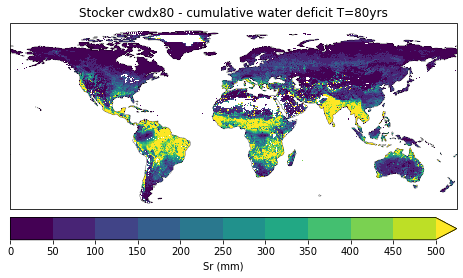

In [16]:
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80.nc')
s = s.cwdx80

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = s.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Stocker cwdx80 - cumulative water deficit T=80yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_stocker_cwdx80.jpg',bbox_inches='tight',dpi=300)


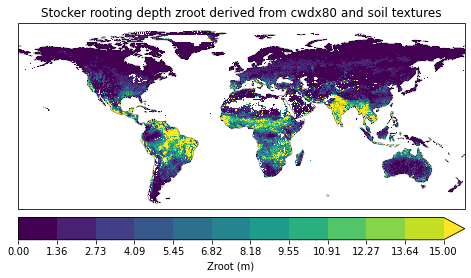

In [15]:
sd = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/zroot_cwd80.nc')
sd = sd.zroot_cwd80/1000 #convert to meters

lvls = np.linspace(0,15,12) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = sd.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Zroot (m)', pad=0.02, ticks = lvls)
ax.set_title(f'Stocker rooting depth zroot derived from cwdx80 and soil textures')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_stocker_zroot_cwd80.jpg',bbox_inches='tight',dpi=300)

### LAN SR

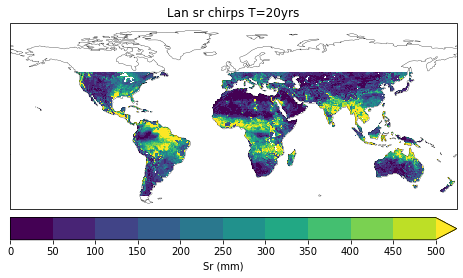

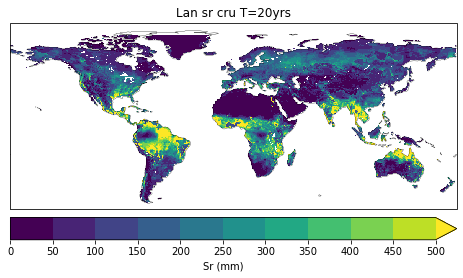

In [17]:
# chirps T20
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_20yrs.nc')
l = l.sr_chirps_20yrs[0]

lvls = np.arange(0,550,50)
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps T=20yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_20yrs.jpg',bbox_inches='tight',dpi=300)

# cru T20
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_20yrs.nc')
l = l.sr_cru_20yrs[0]

lvls = np.arange(0,550,50) 
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru T=20yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_20yrs.jpg',bbox_inches='tight',dpi=300)


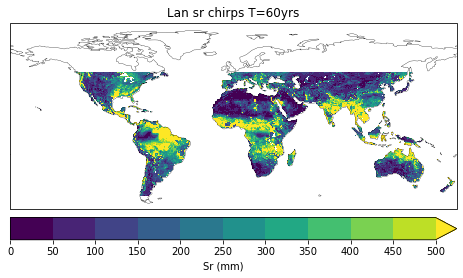

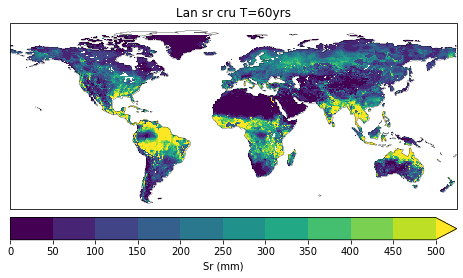

In [18]:
# chirps T60
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_60yrs.nc')
l = l.sr_chirps_60yrs[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps T=60yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_60yrs.jpg',bbox_inches='tight',dpi=300)

# cru T60
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_60yrs.nc')
l = l.sr_cru_60yrs[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru T=60yrs')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_60yrs.jpg',bbox_inches='tight',dpi=300)


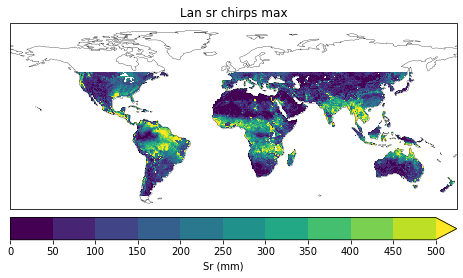

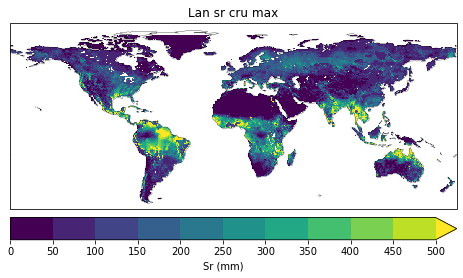

In [19]:
# chirps max
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_max.nc')
l = l.sr_chirps_max[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr chirps max')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_chirps_max.jpg',bbox_inches='tight',dpi=300)

# cru max
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_max.nc')
l = l.sr_cru_max[0]

lvls = np.arange(0,550,50) # scale W-E paper
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = l.plot(ax=ax, cmap=cmap, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'Lan sr cru max')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_lan_cru_max.jpg',bbox_inches='tight',dpi=300)


### SR COMPARISON

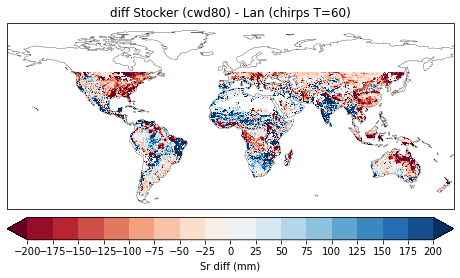

In [20]:
# diff lan-stocker
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_05grid.nc')
s = s.cwdx80

l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_chirps_60yrs.nc')
l = l.sr_chirps_60yrs[0]

d = s-l

lvls = np.linspace(-200,200,17) # scale W-E paper
cmapb = mpl.cm.RdBu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = d.plot(ax=ax, cmap=cmapb, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr diff (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'diff Stocker (cwd80) - Lan (chirps T=60)')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_diff_lan_chirps_60yrs_stocker_cwd80.jpg',bbox_inches='tight',dpi=300)


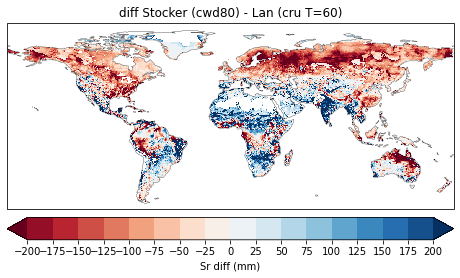

In [21]:
# diff lan-stocker
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_cru_grid.nc')
s = s.cwdx80

l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_60yrs.nc')
l = l.sr_cru_60yrs[0]

d = s-l

lvls = np.linspace(-200,200,17) # scale W-E paper
cmapb = mpl.cm.RdBu
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.3)
cf = d.plot(ax=ax, cmap=cmapb, add_colorbar=False, vmin=0, vmax=10, levels=lvls)
cbar = plt.colorbar(cf, orientation='horizontal', label='Sr diff (mm)', pad=0.02, ticks = lvls)
ax.set_title(f'diff Stocker (cwd80) - Lan (cru T=60)')
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
fig.savefig(f'{out_dir}/figures/sr_figures/sr_diff_lan_cru_60yrs_stocker_cwd80.jpg',bbox_inches='tight',dpi=300)


### COMPARE POINT ESTIMATES

In [82]:
#Europe
lat_min_e, lat_max_e = 35,75 # 36,46 only spain cluster
lon_min_e, lon_max_e = -12,29 # -10,5 only spain cluster

#Asia
lat_min_a, lat_max_a = 1,26
lon_min_a, lon_max_a = 68,105

#us
lat_min_u, lat_max_u = 12,65
lon_min_u, lon_max_u = -132,-52

#south america
lat_min_s, lat_max_s = -32,-4
lon_min_s, lon_max_s = -60,-32

#south africa
lat_min_f, lat_max_f = -35.3,-19.3
lon_min_f, lon_max_f = 12,36

#australia
lat_min_t, lat_max_t = -40,-25
lon_min_t, lon_max_t = 140,155

In [83]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
f = f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv'
df = pd.read_csv(f,index_col=0)
df = df[['sr_20','lon','lat']]
df = df.dropna()
cmap_vd2 = cmap

sr = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments_{data_sources}/sr_combined_gumbelfit_rzyear_{data_sources}.csv', index_col=0)
df['sr_80'] = sr['80.0']

rf = pd.read_csv(f'{work_dir}/output/regression/rf_results_modelb_combined_test.csv',index_col=0)
df['rf_sr'] = rf['Sr_p']
df = df.dropna()

ls = pd.read_csv(f'{work_dir}/output/sr_calculation/stocker_lan_sr_df.csv',index_col=0)
df[ls.columns] = ls[ls.columns]

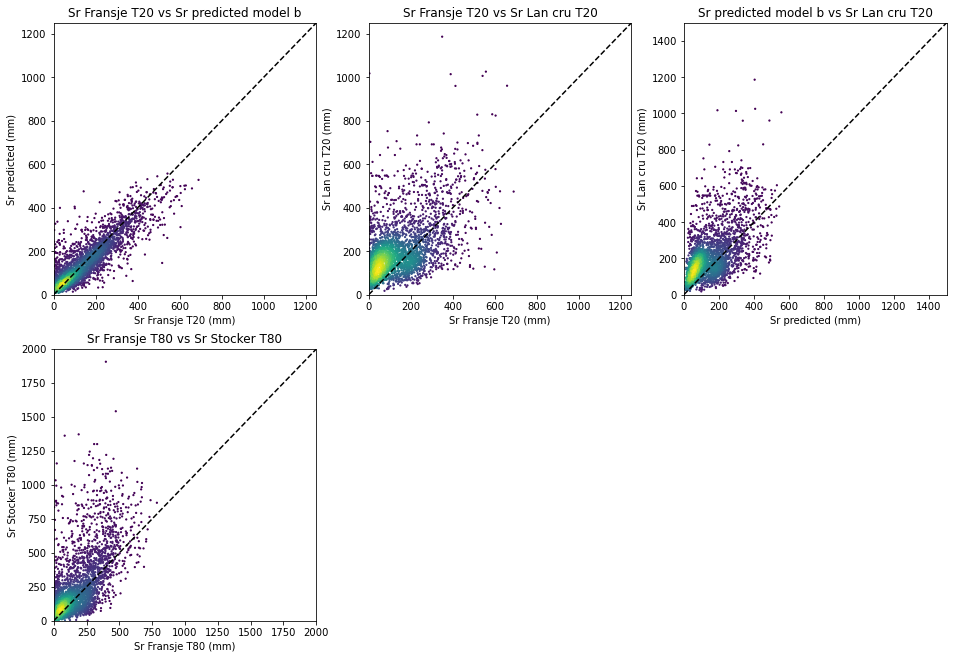

In [94]:
fig = plt.figure(figsize=(16,11))
ax = fig.add_subplot(231)
x = df['sr_20']
y = df['rf_sr']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1250)
ax.set_ylim(0,1250)
ax.set_xlabel('Sr Fransje T20 (mm)')
ax.set_ylabel('Sr predicted (mm)')
ax.set_title('Sr Fransje T20 vs Sr predicted model b')

ax = fig.add_subplot(232)
x = df['sr_20']
y = df['lan_cru_20yrs']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1250)
ax.set_ylim(0,1250)
ax.set_xlabel('Sr Fransje T20 (mm)')
ax.set_ylabel('Sr Lan cru T20 (mm)')
ax.set_title('Sr Fransje T20 vs Sr Lan cru T20')

ax = fig.add_subplot(233)
x = df['rf_sr']
y = df['lan_cru_20yrs']
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,1500)
ax.set_ylim(0,1500)
ax.set_xlabel('Sr predicted (mm)')
ax.set_ylabel('Sr Lan cru T20 (mm)')
ax.set_title('Sr predicted model b vs Sr Lan cru T20')

ax = fig.add_subplot(234)
x = df['sr_80']
y = df['stocker_cwd80x_mm']
x = x.dropna()
y = y[x.index]
y =  y.dropna()
x = x[y.index]
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
ax.scatter(x,y,c=z,s=1.5)
ax.plot([0,2000],[0,2000],'k--')
ax.set_xlim(0,2000)
ax.set_ylim(0,2000)
ax.set_xlabel('Sr Fransje T80 (mm)')
ax.set_ylabel('Sr Stocker T80 (mm)')
ax.set_title('Sr Fransje T80 vs Sr Stocker T80')

# ax = fig.add_subplot(234)
# x = df['lan_cru_60yrs']
# y = df['stocker_cwd80x_mm']
# x = x.dropna()
# y = y[x.index]
# y =  y.dropna()
# x = x[y.index]
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# ax.scatter(x,y,c=z,s=1.5)
# ax.plot([0,2000],[0,2000],'k--')
# ax.set_xlim(0,2000)
# ax.set_ylim(0,2000)
# ax.set_xlabel('Sr Lan cru T60 (mm)')
# ax.set_ylabel('Sr Stocker T80 (mm)')
# ax.set_title('Sr Lan cru T60 vs Sr Stocker T80')

# ax = fig.add_subplot(235)
# x = df['lan_chirps_60yrs']
# y = df['stocker_cwd80x_mm']
# x = x.dropna()
# y = y[x.index]
# y =  y.dropna()
# x = x[y.index]
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)
# ax.scatter(x,y,c=z,s=1.5)
# ax.plot([0,2000],[0,2000],'k--')
# ax.set_xlim(0,2000)
# ax.set_ylim(0,2000)
# ax.set_xlabel('Sr Lan chirps T60 (mm)')
# ax.set_ylabel('Sr Stocker T80 (mm)')
# ax.set_title('Sr Lan chirps T60 vs Sr Stocker T80')
fig.savefig(f'{out_dir}/figures/sr_comparison/points/scatter_sr_comparison.jpg',bbox_inches='tight',dpi=300)


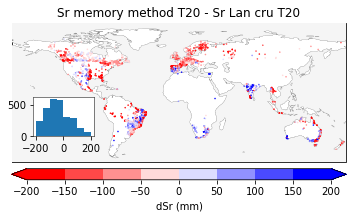

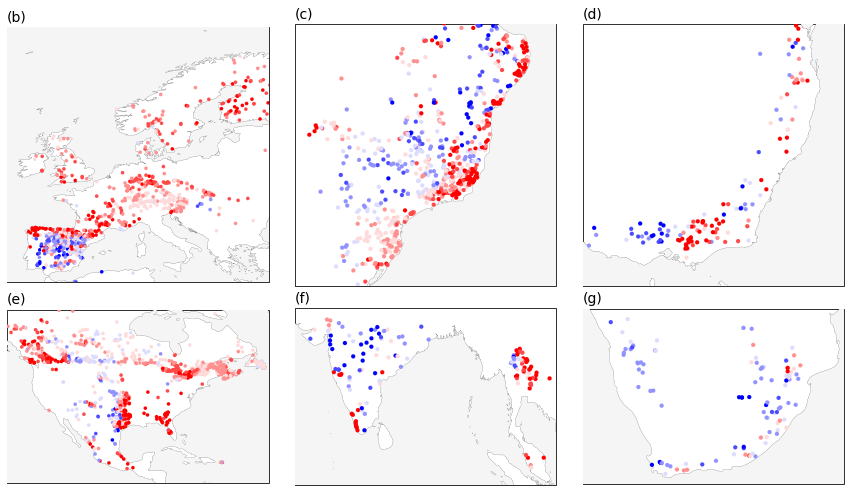

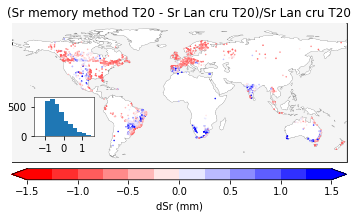

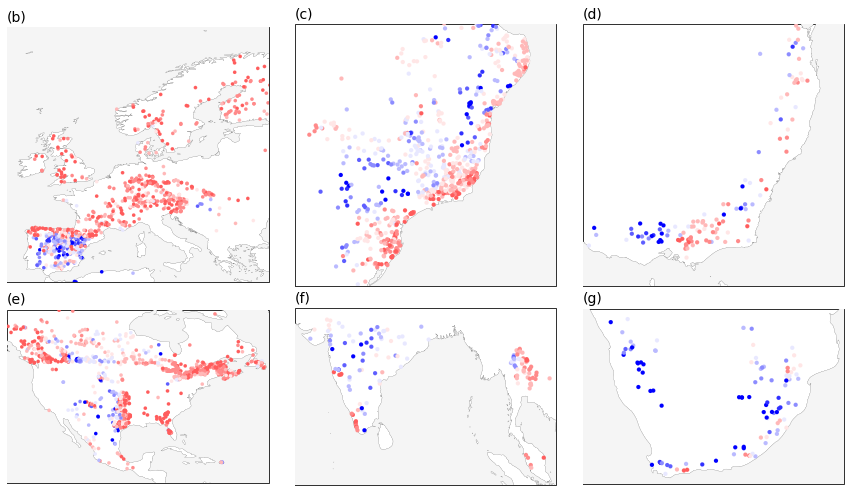

In [96]:
# sr memory method vs Lan cru T20 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-200,200,9)
bounds2 = np.linspace(-200,200,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['sr_20']-df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr memory method T20 - Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr memory method vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['sr_20']-df['lan_cru_20yrs'])/df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr memory method T20 - Sr Lan cru T20)/Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_lan_cru_T20-rel_2.jpg',bbox_inches='tight',dpi=300)


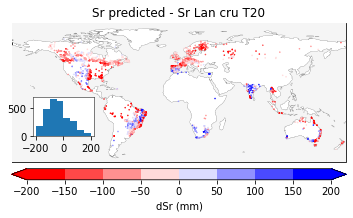

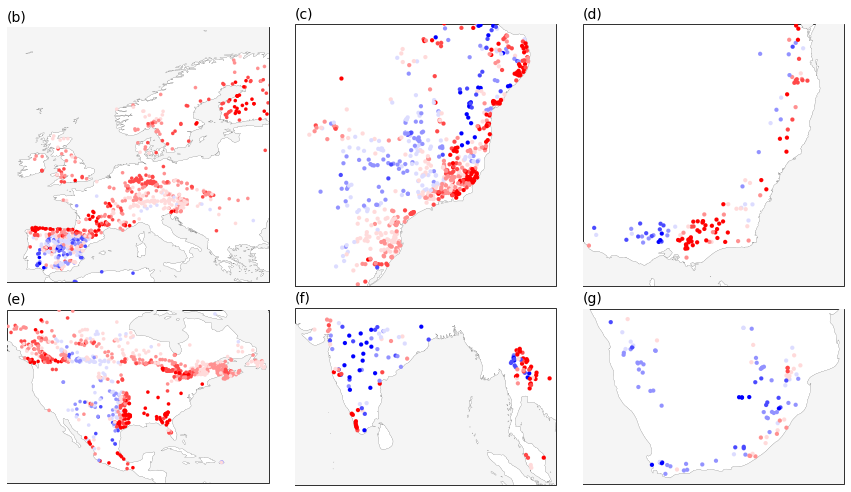

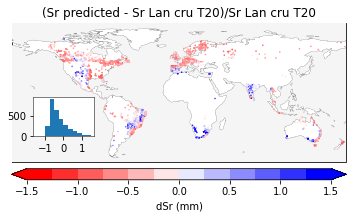

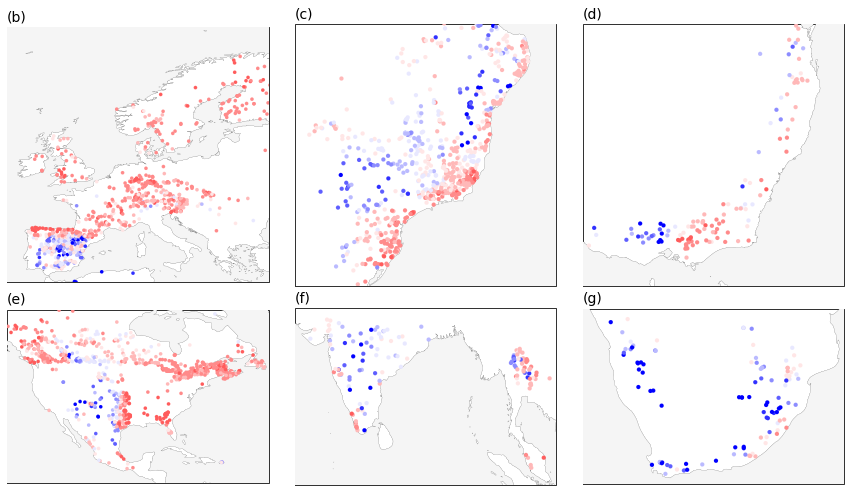

In [97]:
# sr predicted vs Lan cru T20 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-200,200,9)
bounds2 = np.linspace(-200,200,9)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['rf_sr']-df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr predicted - Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr predicted vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['rf_sr']-df['lan_cru_20yrs'])/df['lan_cru_20yrs']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr predicted - Sr Lan cru T20)/Sr Lan cru T20',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_predicted_vs_sr_lan_cru_T20-rel_2.jpg',bbox_inches='tight',dpi=300)


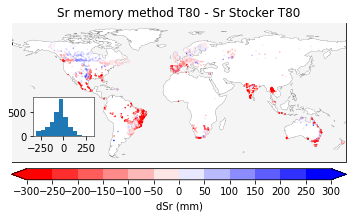

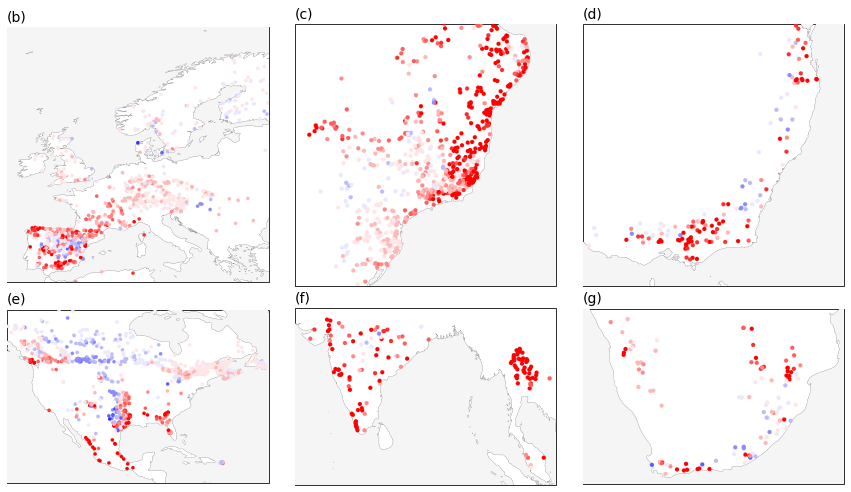

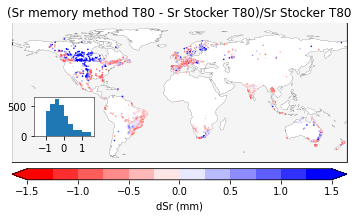

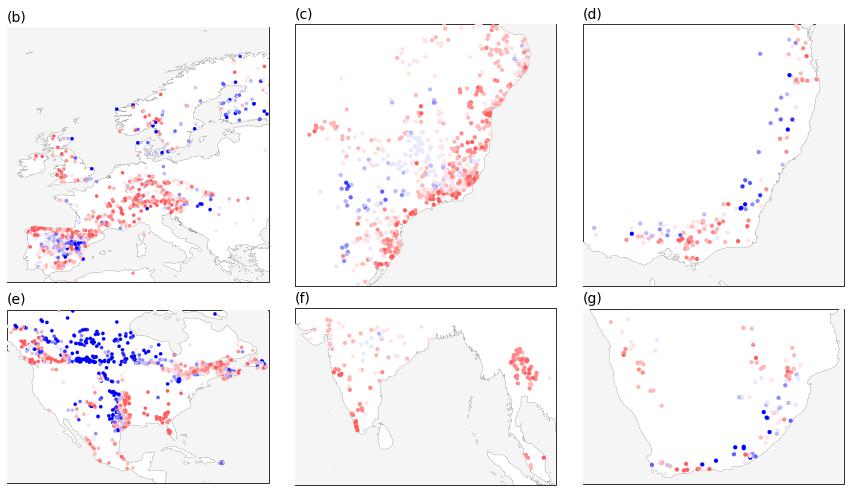

In [99]:
# sr memory method T80 vs Stocker T80 - abs
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-300,300,13)
bounds2 = np.linspace(-300,300,13)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = df['sr_20']-df['stocker_cwd80x_mm']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'Sr memory method T80 - Sr Stocker T80',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-abs.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-abs_2.jpg',bbox_inches='tight',dpi=300)


# sr memory method vs Lan cru T20 - rel
cmap_rdbu = cm.get_cmap('bwr_r')
bounds = np.linspace(-1.5,1.5,13)
bounds2 = np.linspace(-1.5,1.5,7)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

dif = (df['sr_80']-df['stocker_cwd80x_mm'])/df['stocker_cwd80x_mm']
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s = ax.scatter(df.lon,df.lat,c=dif,s=0.3,cmap=cmap_rdbu, norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal', label='dSr (mm)',spacing='proportional',extend='both', pad=0.02,aspect=30, norm=norm,ticks=bounds2)
ax.set_title(f'(Sr memory method T80 - Sr Stocker T80)/Sr Stocker T80',size=12)

iax = inset_axes(ax, width="18%", height="28%",loc=3,bbox_transform=ax.transAxes,bbox_to_anchor=(0.05,0.15,1,1))
plt.setp(list(iax.spines.values()),linewidth=0.5)
bins = bounds
iax.hist(dif, bins=bounds)
fig.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-rel.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(15,10))
ax = fig2.add_subplot(231,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.1,hspace=-0.2)
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_e,lat_max_e)
ax.set_xlim(lon_min_e,lon_max_e)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(b)',size=14,loc='left')

ax = fig2.add_subplot(232,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_s,lat_max_s)
ax.set_xlim(lon_min_s,lon_max_s)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(c)',size=14,loc='left')

ax = fig2.add_subplot(233,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_t,lat_max_t)
ax.set_xlim(lon_min_t,lon_max_t)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(d)',size=14,loc='left')

ax = fig2.add_subplot(234,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_u,lat_max_u)
ax.set_xlim(lon_min_u,lon_max_u)
s=ax.scatter(df.lon,df.lat,s=12,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(e)',size=14,loc='left')

ax = fig2.add_subplot(235,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_a,lat_max_a)
ax.set_xlim(lon_min_a,lon_max_a)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(f)',size=14,loc='left')

ax = fig2.add_subplot(236,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min_f,lat_max_f)
ax.set_xlim(lon_min_f,lon_max_f)
s=ax.scatter(df.lon,df.lat,s=17,c=dif,edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu,norm=norm,zorder=101)
ax.set_title('(g)',size=14,loc='left')
fig2.savefig(f'{out_dir}/figures/sr_comparison/points/map_sr_memorymethod_vs_sr_stocker_T80-rel_2.jpg',bbox_inches='tight',dpi=300)


Text(0.5, 1.0, '')

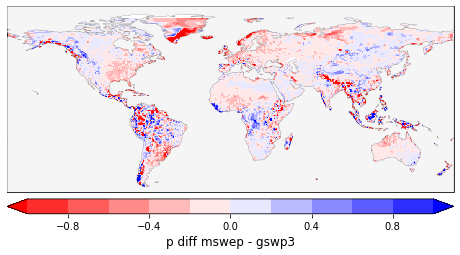

In [175]:
# mswep vs gswp
pm = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_mswep_land.nc')
pg = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_gswp3_land.nc')
dif = pm.precipitation[0,:,:] - pg.pr[0,:,:]

lvls = np.linspace(-1,1,11)
lvls2 = np.linspace(-1,1,11)
cmap = cm.get_cmap('bwr_r')
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
# ax.plot(df.lon,df.lat,marker='o',markeredgecolor='k',markerfacecolor=None,markeredgewidth=0.1,markersize=0.5,linestyle='None',zorder=101)
# ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = dif.plot(ax=ax, cmap=cmap,levels=lvls,add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.015,aspect=30)
cbar.set_label('p diff mswep - gswp3',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.set_title('')
# ax.text(-177,78,'(a)',size=11,zorder=101)

## gridded variables - mswep

In [50]:
data_sources = 'mswep-p_gleam-ep_gswp-t'
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()

In [51]:
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_mswep_land.nc')
t = xr.open_dataset(f'{work_dir}/output/gridded_sr/t_mean_gswp3_land.nc')
idu = xr.open_dataset(f'{work_dir}/output/gridded_sr/idu_mean_land.nc')
asi = xr.open_dataset(f'{work_dir}/output/gridded_sr/asi_mswep_land.nc')
p_days = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_days_mswep_land.nc')

/tmp/ipykernel_125/2981764165.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGnBu").copy()
  cmap.set_bad('lightgrey')


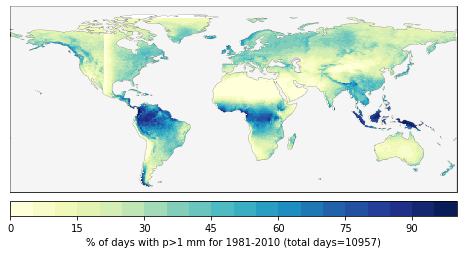

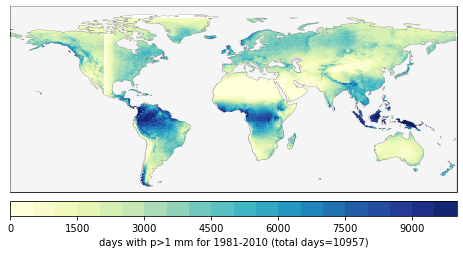

In [52]:
# pdays
b = (p_days.p_days[:,:]>10)
bb = p_days.p_days / b
pp = p_days.p_days/10957 * 100
cmap = cm.get_cmap('YlGnBu')
cmap.set_bad('lightgrey')

lvls = np.linspace(0,100,21)
lvls2 = np.linspace(0,100,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = pp[:,:].plot(ax=ax, cmap=cmap,add_colorbar=False, levels=lvls)#,norm=mpl.colors.LogNorm())
cbar = plt.colorbar(a, orientation='horizontal', label='% of days with p>1 mm for 1981-2010 (total days=10957)',extend='neither', pad=0.02,aspect=30)
# fig2.savefig(f'{out_dir}/gridded_sr/figures/pdays.jpg',bbox_inches='tight',dpi=300)

lvls = np.linspace(0,10000,21)
lvls2 = np.linspace(0,10000,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = bb[:,:].plot(ax=ax, cmap=cmap,add_colorbar=False, levels=lvls)#,norm=mpl.colors.LogNorm())
cbar = plt.colorbar(a, orientation='horizontal', label='days with p>1 mm for 1981-2010 (total days=10957)',extend='neither', pad=0.02,aspect=30)
# fig2.savefig(f'{out_dir}/gridded_sr/figures/pdays_5.jpg',bbox_inches='tight',dpi=300)

In [53]:
#cmap temperature
import matplotlib
cmap = cm.get_cmap('RdBu_r', 26)
cl = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
blues = [cl[1],cl[4],cl[7],cl[10]]
reds = cl[13:25]
br = ListedColormap(np.concatenate([blues,reds]))
br.set_over(cl[-1])
br.set_under(cl[0])
br.set_bad('lightgrey')

/tmp/ipykernel_125/4093773250.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("PuRd").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_125/4093773250.py:45: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGnBu").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_125/4093773250.py:64: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove th

Text(-177, 78, '(d)')

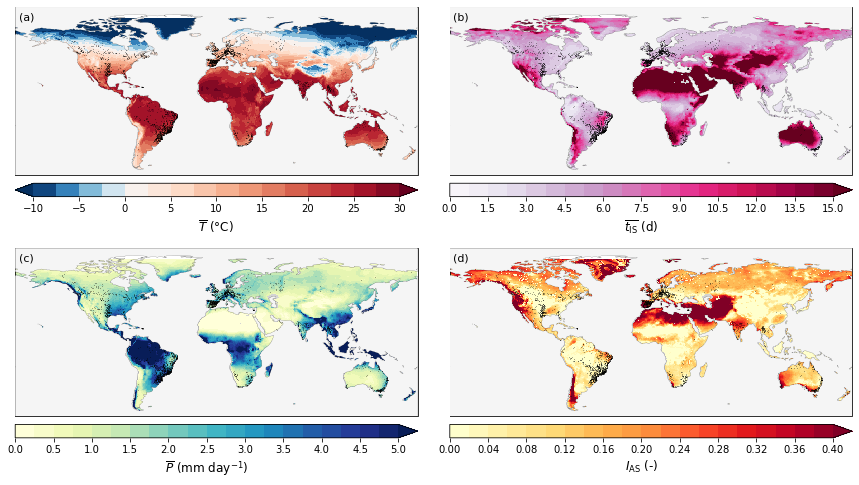

In [54]:
fig2 = plt.figure(figsize=(15,15))
ax = fig2.add_subplot(221,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.08,hspace=-0.58)

# t mean
lvls = np.linspace(-10,30,17)
lvls2 = np.linspace(-10,30,17)
cmap = br
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
# ax.plot(df.lon,df.lat,marker='o',markeredgecolor='k',markerfacecolor=None,markeredgewidth=0.1,markersize=0.5,linestyle='None',zorder=101)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (t.tas[0,:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls,add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.015,aspect=30)
cbar.set_label('$\overline{T}$ ($\degree$C)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.set_title('')
ax.text(-177,78,'(a)',size=11,zorder=101)

# idu mean
lvls = np.linspace(0,15,21)
lvls2 = np.linspace(0,15,11)
cmap = cm.get_cmap('PuRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(222,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (idu.idu_mean[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$\overline{t_\mathrm{IS}}$ (d)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(b)',size=11,zorder=101)

# p mean
lvls = np.linspace(0,5,21)
lvls2 = np.linspace(0,5,11)
cmap = cm.get_cmap('YlGnBu')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(223,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (p.precipitation[0,:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
ax.text(-177,78,'(c)',size=11,zorder=101)
ax.set_title('')
cbar.set_label('$\overline{P}$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)

# asi
lvls = np.linspace(0,0.4,21)
lvls2 = np.linspace(0,0.4,11)
cmap = cm.get_cmap('YlOrRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(224,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (asi.asi[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$I_\mathrm{AS}$ (-)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(d)',size=11,zorder=101)

# fig2.savefig(f'{out_dir}/gridded_sr/figures/4_variables_maps.jpg',bbox_inches='tight',dpi=300)


/tmp/ipykernel_125/3929745858.py:30: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("PuRd").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_125/3929745858.py:50: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGnBu").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_125/3929745858.py:71: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove th

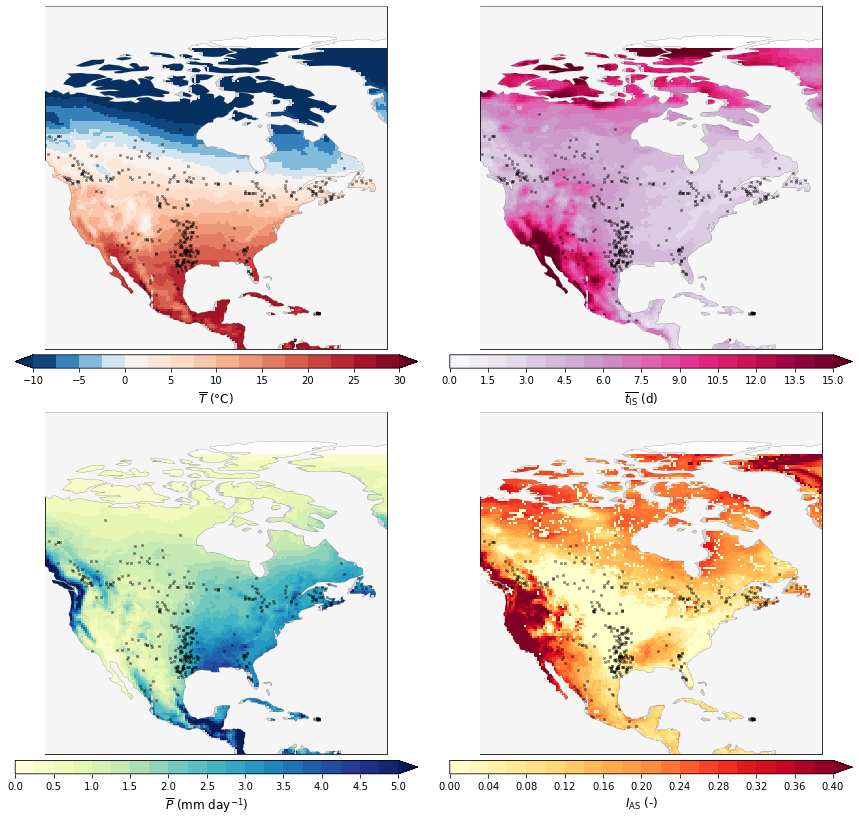

In [56]:
# maps of North America
fig2 = plt.figure(figsize=(15,15))
ax = fig2.add_subplot(221,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.08,hspace=-0.01)

# t mean
lvls = np.linspace(-10,30,17)
lvls2 = np.linspace(-10,30,17)
cmap = br
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-60,90)
ax.set_xlim(-130,-50)
ax.set_ylim(10,90)
# ax.plot(df.lon,df.lat,marker='o',markeredgecolor='k',markerfacecolor=None,markeredgewidth=0.1,markersize=0.5,linestyle='None',zorder=101)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=2.2,linestyle='None',zorder=101)
a = (t.tas[0,:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls,add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.015,aspect=30)
cbar.set_label('$\overline{T}$ ($\degree$C)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.set_title('')
# ax.text(-177,78,'(a)',size=11,zorder=101)

# idu mean
lvls = np.linspace(0,15,21)
lvls2 = np.linspace(0,15,11)
cmap = cm.get_cmap('PuRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(222,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-60,90)
ax.set_xlim(-130,-50)
ax.set_ylim(10,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=2.2,linestyle='None',zorder=101)
a = (idu.idu_mean[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$\overline{t_\mathrm{IS}}$ (d)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
# ax.text(-177,78,'(b)',size=11,zorder=101)

# p mean
lvls = np.linspace(0,5,21)
lvls2 = np.linspace(0,5,11)
cmap = cm.get_cmap('YlGnBu')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(223,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-60,90)
ax.set_xlim(-130,-50)
ax.set_ylim(10,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=2.2,linestyle='None',zorder=101)
a = (p.precipitation[0,:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
# ax.text(-177,78,'(c)',size=11,zorder=101)
ax.set_title('')
cbar.set_label('$\overline{P}$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)

# asi
lvls = np.linspace(0,0.4,21)
lvls2 = np.linspace(0,0.4,11)
cmap = cm.get_cmap('YlOrRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(224,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-60,90)
ax.set_xlim(-130,-50)
ax.set_ylim(10,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=2.2,linestyle='None',zorder=101)
a = (asi.asi[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$I_\mathrm{AS}$ (-)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
# ax.text(-177,78,'(d)',size=11,zorder=101)

fig2.savefig(f'{out_dir}/gridded_sr/figures/4_variables_maps_northamerica_mswep.jpg',bbox_inches='tight',dpi=300)

## gridded variables

In [4]:
data_sources = 'gswp-p_gleam-ep_gswp-t'
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()

In [5]:
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_gswp3_land.nc')
t = xr.open_dataset(f'{work_dir}/output/gridded_sr/t_mean_gswp3_land.nc')
idu = xr.open_dataset(f'{work_dir}/output/gridded_sr/idu_mean_land.nc')
asi = xr.open_dataset(f'{work_dir}/output/gridded_sr/asi_land.nc')
p_days = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_days_land.nc')
lai = xr.open_dataset(f'{work_dir}/output/gridded_sr/lai_mean_land.nc')

/tmp/ipykernel_2264/964028316.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGnBu").copy()
  cmap.set_bad('lightgrey')


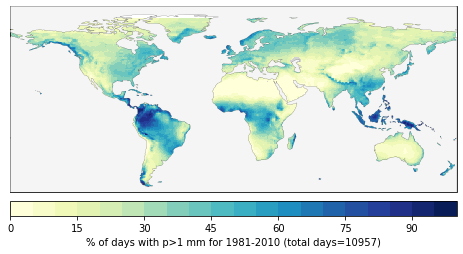

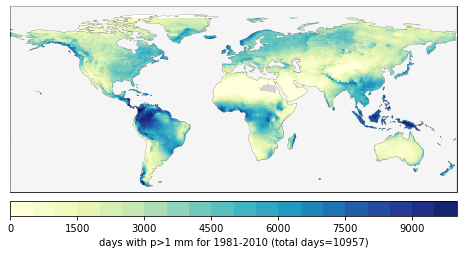

In [6]:
# pdays
b = (p_days.p_days[:,:]>10)
bb = p_days.p_days / b
pp = p_days.p_days/10957 * 100
cmap = cm.get_cmap('YlGnBu')
cmap.set_bad('lightgrey')

lvls = np.linspace(0,100,21)
lvls2 = np.linspace(0,100,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = pp[:,:].plot(ax=ax, cmap=cmap,add_colorbar=False, levels=lvls)#,norm=mpl.colors.LogNorm())
cbar = plt.colorbar(a, orientation='horizontal', label='% of days with p>1 mm for 1981-2010 (total days=10957)',extend='neither', pad=0.02,aspect=30)
fig2.savefig(f'{out_dir}/gridded_sr/figures/pdays.jpg',bbox_inches='tight',dpi=300)

lvls = np.linspace(0,10000,21)
lvls2 = np.linspace(0,10000,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = bb[:,:].plot(ax=ax, cmap=cmap,add_colorbar=False, levels=lvls)#,norm=mpl.colors.LogNorm())
cbar = plt.colorbar(a, orientation='horizontal', label='days with p>1 mm for 1981-2010 (total days=10957)',extend='neither', pad=0.02,aspect=30)
fig2.savefig(f'{out_dir}/gridded_sr/figures/pdays_5.jpg',bbox_inches='tight',dpi=300)

/tmp/ipykernel_2264/801469857.py:6: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlOrRd").copy()
  cmap.set_bad('lightgrey')


Text(-177, 78, '(d)')

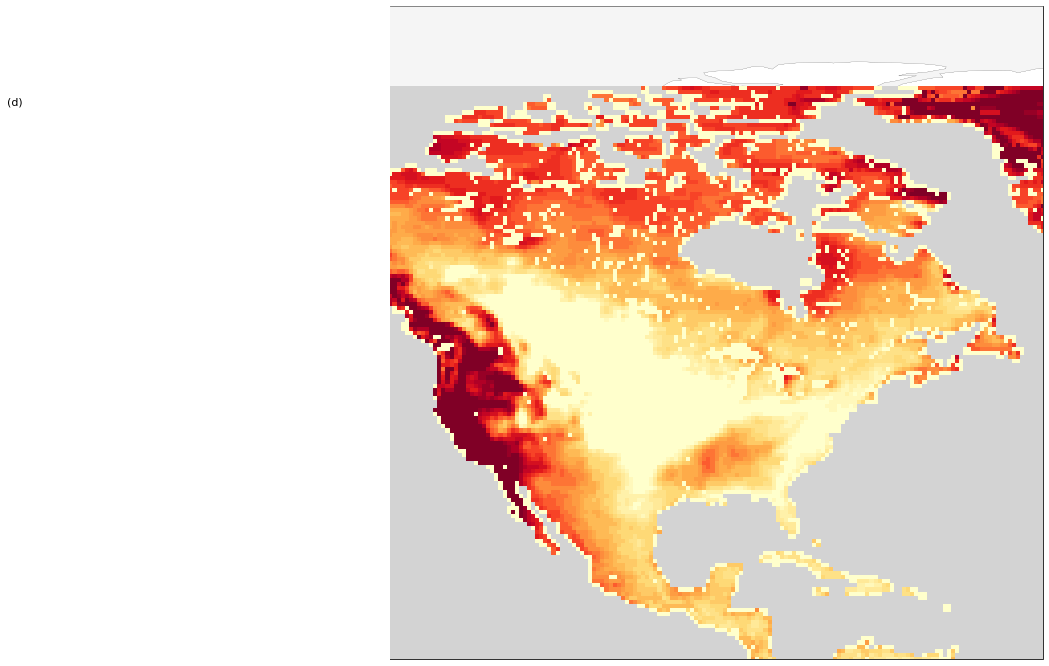

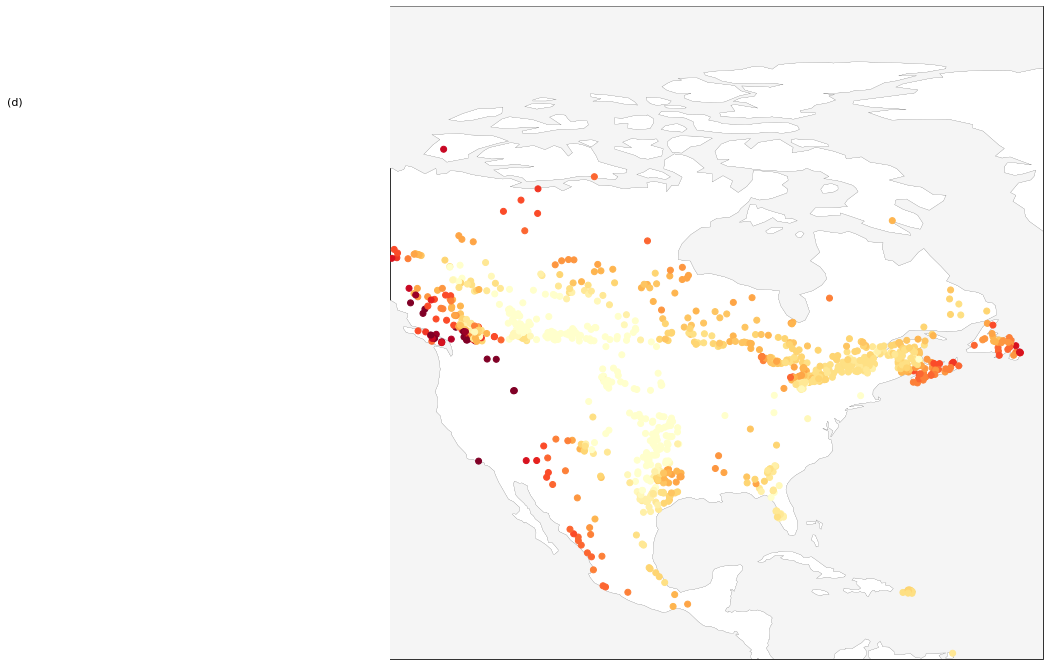

In [7]:
# asi
lvls = np.linspace(0,0.4,21)
lvls2 = np.linspace(0,0.4,11)
cmap = cm.get_cmap('YlOrRd')
cmap2 = cm.get_cmap('YlOrRd')
cmap.set_bad('lightgrey')
norm = mpl.colors.BoundaryNorm(lvls, cmap2.N)

fig2 = plt.figure(figsize=(12,12))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-60,90)
ax.set_xlim(-130,-50)
ax.set_ylim(10,90)
# ax.scatter(df.lon,df.lat,c=df.asi,cmap=cmap2,norm=norm,zorder=102)
# s=ax.scatter(test_dfs.lon,test_dfs.lat,s=4.7,c=test_dfs['Sr_p'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
a = (asi.asi[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False,zorder=101)
# cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$I_\mathrm{AS}$ (-)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(d)',size=11,zorder=101)

fig2 = plt.figure(figsize=(12,12))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-60,90)
ax.set_xlim(-130,-50)
ax.set_ylim(10,90)
ax.scatter(df.lon,df.lat,c=df.asi,cmap=cmap2,norm=norm,zorder=102)
# s=ax.scatter(test_dfs.lon,test_dfs.lat,s=4.7,c=test_dfs['Sr_p'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
# a = (asi.asi[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False,zorder=101)
# cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$I_\mathrm{AS}$ (-)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(d)',size=11,zorder=101)

Text(-177, 78, '(d)')

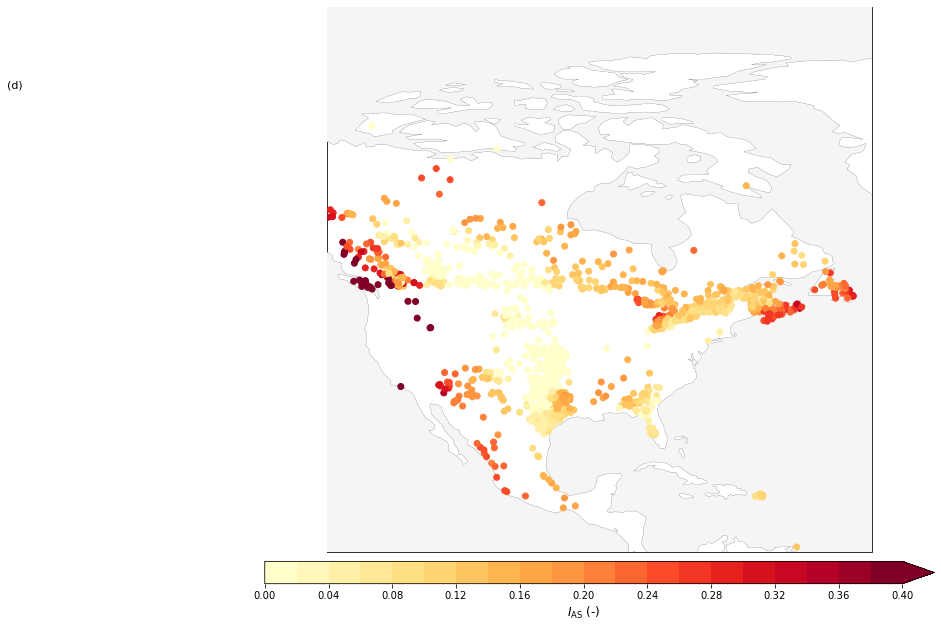

In [9]:
data_sources = 'gswp-p_hs-ep_gswp-t'
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()

fig2 = plt.figure(figsize=(12,12))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-180,180)
# ax.set_ylim(-60,90)
ax.set_xlim(-130,-50)
ax.set_ylim(10,90)
s=ax.scatter(df.lon,df.lat,c=df.asi,cmap=cmap2,norm=norm,zorder=102)
# s=ax.scatter(test_dfs.lon,test_dfs.lat,s=4.7,c=test_dfs['Sr_p'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
# a = (asi.asi[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False,zorder=101)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$I_\mathrm{AS}$ (-)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(d)',size=11,zorder=101)

In [8]:
# mask out points outside catchment ranges
p5 = df.p_mean.quantile(0.05)
p95 = df.p_mean.quantile(0.95)
pl= xr.where(((p.pr>=p5)&(p.pr<=p95)), p.pr, np.nan)

t5 = df.t_mean.quantile(0.05)
t95 = df.t_mean.quantile(0.95)
tl= xr.where(((t.tas>=t5)&(t.tas<=t95)), t.tas, np.nan)

idu5 = df.idu_mean.quantile(0.05)
idu95 = df.idu_mean.quantile(0.95)
idul= xr.where(((idu.idu_mean>=idu5)&(idu.idu_mean<=idu95)), idu.idu_mean, np.nan)

asi5 = df.asi.quantile(0.05)
asi95 = df.asi.quantile(0.95)
asil= xr.where(((asi.asi>=asi5)&(asi.asi<=asi95)), asi.asi, np.nan)

# make one mask
pl = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),pl,np.nan)
tl = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),tl,np.nan)
asil = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),asil,np.nan)
idul = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),idul,np.nan)

In [9]:
# mask out points outside catchment ranges
p5 = df.p_mean.quantile(0.01)
p95 = df.p_mean.quantile(0.99)
pl= xr.where(((p.pr>=p5)&(p.pr<=p95)), p.pr, np.nan)

t5 = df.t_mean.quantile(0.01)
t95 = df.t_mean.quantile(0.99)
tl= xr.where(((t.tas>=t5)&(t.tas<=t95)), t.tas, np.nan)

idu5 = df.idu_mean.quantile(0.01)
idu95 = df.idu_mean.quantile(0.99)
idul= xr.where(((idu.idu_mean>=idu5)&(idu.idu_mean<=idu95)), idu.idu_mean, np.nan)

asi5 = df.asi.quantile(0.01)
asi95 = df.asi.quantile(0.99)
asil= xr.where(((asi.asi>=asi5)&(asi.asi<=asi95)), asi.asi, np.nan)

# make one mask
pl = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),pl,np.nan)
tl = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),tl,np.nan)
asil = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),asil,np.nan)
idul = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),idul,np.nan)

In [10]:
# mask out points outside catchment ranges
pmax = df.p_mean.max()
pmin = df.p_mean.min()
pl= xr.where(((p.pr>=pmin)&(p.pr<=pmax)), p.pr, np.nan)

tmax = df.t_mean.max()
tmin = df.t_mean.min()
tl= xr.where(((t.tas>=tmin)&(t.tas<=tmax)), t.tas, np.nan)

idumax = df.idu_mean.max()
idumin = df.idu_mean.min()
idul= xr.where(((idu.idu_mean>=idumin)&(idu.idu_mean<=idumax)), idu.idu_mean, np.nan)

asimax = df.asi.max()
asimin = df.asi.min()
asil= xr.where(((asi.asi>=asimin)&(asi.asi<=asimax)), asi.asi, np.nan)

# make one mask
pl = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),pl,np.nan)
tl = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),tl,np.nan)
asil = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),asil,np.nan)
idul = xr.where(((pl>=0)&(idul>=0)&(asil>=0)&(tl>=-50)),idul,np.nan)

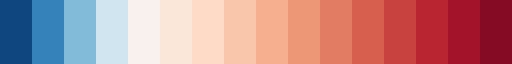

In [11]:
#cmap temperature
import matplotlib
cmap = cm.get_cmap('RdBu_r', 26)
cl = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
blues = [cl[1],cl[4],cl[7],cl[10]]
reds = cl[13:25]
br = ListedColormap(np.concatenate([blues,reds]))
br.set_over(cl[-1])
br.set_under(cl[0])
br.set_bad('lightgrey')
br

/tmp/ipykernel_2264/3017750100.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("PuRd").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_2264/3017750100.py:45: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGnBu").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_2264/3017750100.py:64: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove

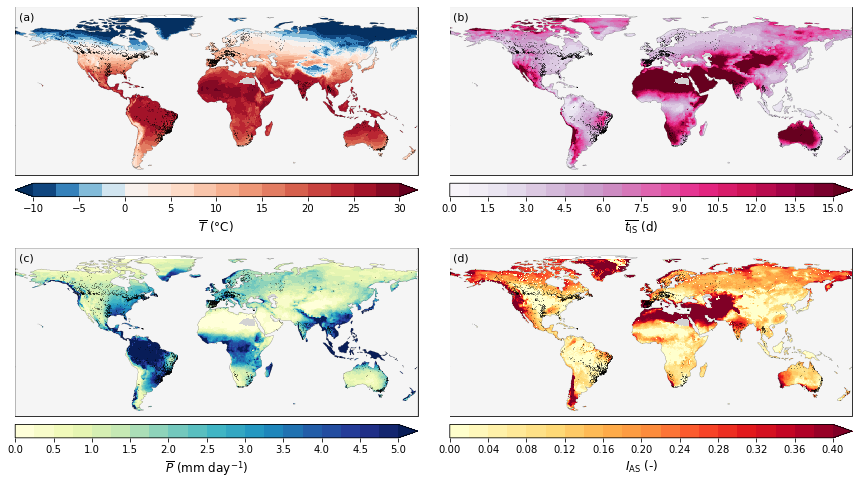

In [12]:
fig2 = plt.figure(figsize=(15,15))
ax = fig2.add_subplot(221,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.08,hspace=-0.58)

# t mean
lvls = np.linspace(-10,30,17)
lvls2 = np.linspace(-10,30,17)
cmap = br
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
# ax.plot(df.lon,df.lat,marker='o',markeredgecolor='k',markerfacecolor=None,markeredgewidth=0.1,markersize=0.5,linestyle='None',zorder=101)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (t.tas[0,:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls,add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.015,aspect=30)
cbar.set_label('$\overline{T}$ ($\degree$C)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.set_title('')
ax.text(-177,78,'(a)',size=11,zorder=101)

# idu mean
lvls = np.linspace(0,15,21)
lvls2 = np.linspace(0,15,11)
cmap = cm.get_cmap('PuRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(222,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (idu.idu_mean[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$\overline{t_\mathrm{IS}}$ (d)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(b)',size=11,zorder=101)

# p mean
lvls = np.linspace(0,5,21)
lvls2 = np.linspace(0,5,11)
cmap = cm.get_cmap('YlGnBu')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(223,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (p.pr[0,:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
ax.text(-177,78,'(c)',size=11,zorder=101)
ax.set_title('')
cbar.set_label('$\overline{P}$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)

# asi
lvls = np.linspace(0,0.4,21)
lvls2 = np.linspace(0,0.4,11)
cmap = cm.get_cmap('YlOrRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(224,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (asi.asi[:,:]/b).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$I_\mathrm{AS}$ (-)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(d)',size=11,zorder=101)

fig2.savefig(f'{out_dir}/gridded_sr/figures/4_variables_maps.jpg',bbox_inches='tight',dpi=300)


/tmp/ipykernel_2264/479317244.py:30: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("PuRd").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_2264/479317244.py:49: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("YlGnBu").copy()
  cmap.set_bad('lightgrey')
/tmp/ipykernel_2264/479317244.py:68: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove th

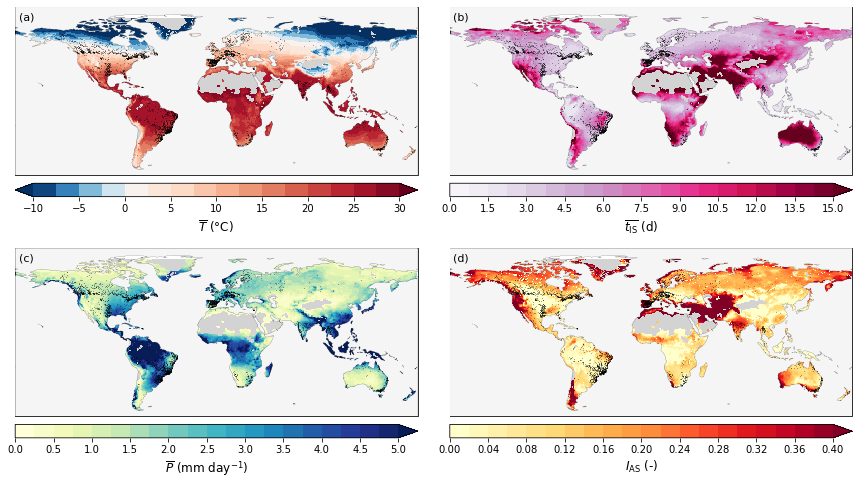

In [13]:
# mask out values outside range
fig2 = plt.figure(figsize=(15,15))
ax = fig2.add_subplot(221,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.08,hspace=-0.58)

# t mean
lvls = np.linspace(-10,30,17)
lvls2 = np.linspace(-10,30,17)
cmap = br
tl[0,0,0]=-15
tl[0,0,1]=35
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
# ax.plot(df.lon,df.lat,marker='o',markeredgecolor='k',markerfacecolor=None,markeredgewidth=0.1,markersize=0.5,linestyle='None',zorder=101)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (tl[0,:,:]).plot(ax=ax, cmap=cmap,levels=lvls,add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.015,aspect=30)
cbar.set_label('$\overline{T}$ ($\degree$C)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.set_title('')
ax.text(-177,78,'(a)',size=11,zorder=101)

# idu mean
lvls = np.linspace(0,15,21)
lvls2 = np.linspace(0,15,11)
cmap = cm.get_cmap('PuRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(222,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (idul[:,:]).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$\overline{t_\mathrm{IS}}$ (d)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(b)',size=11,zorder=101)
ax.set_title('')

# p mean
lvls = np.linspace(0,5,21)
lvls2 = np.linspace(0,5,11)
cmap = cm.get_cmap('YlGnBu')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(223,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (pl[0,:,:]).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
ax.text(-177,78,'(c)',size=11,zorder=101)
ax.set_title('')
cbar.set_label('$\overline{P}$ ($\mathrm{mm}$ $\mathrm{day}^{-1}$)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)

# asi
lvls = np.linspace(0,0.4,21)
lvls2 = np.linspace(0,0.4,11)
cmap = cm.get_cmap('YlOrRd')
cmap.set_bad('lightgrey')
ax = fig2.add_subplot(224,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=0.2,linestyle='None',zorder=101)
a = (asil).plot(ax=ax, cmap=cmap,levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.015,aspect=30,ticks=lvls2)
cbar.set_label('$I_\mathrm{AS}$ (-)',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.text(-177,78,'(d)',size=11,zorder=101)
ax.set_title('')
fig2.savefig(f'{out_dir}/gridded_sr/figures/4_variables_maps.jpg',bbox_inches='tight',dpi=300)


In [63]:
lai

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 720, lat: 272)
Coordinates:
  * time       (time) datetime64[ns] 2010-07-05
  * lon        (lon) float64 -180.0 -179.5 -179.0 -178.5 ... 178.5 179.0 179.5
  * lat        (lat) float64 80.0 79.5 79.0 78.5 ... -54.0 -54.5 -55.0 -55.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    LAI        (time, lat, lon) float32 ...
Attributes: (12/22)
    CDI:                  Climate Data Interface version 2.0.1 (https://mpime...
    Conventions:          CF-1.6
    source:               Derived from EO satellite imagery
    institution:          VITO NV
    history:              Tue Feb 06 15:29:57 2024: cdo -f nc ifthen topo_lan...
    product_version:      V2.0.2
    ...                   ...
    parent_identifier:    urn:cgls:global:lai_v2_1km
    time_coverage_end:    1999-03-20T23:59:59Z
    title:                10-daily Leaf Area Index 1KM: GLOBE 1999-01-10T00:0...
    identifier:           urn:cgls:global:lai_v2_1km:LAI_199901100000_GLOBE_V...
    frequency:            mon
    CDO:                  Climate Data Operators version 2.0.0 (https://mpime...

Text(0.5, 1.0, '')

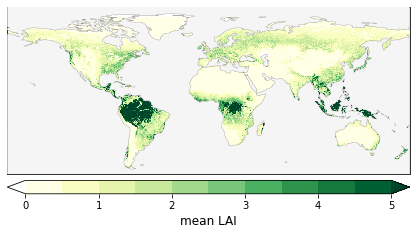

In [66]:
# lai
fig2 = plt.figure(figsize=(15,15))
ax = fig2.add_subplot(221,projection=ccrs.PlateCarree())
plt.subplots_adjust(wspace=0.08,hspace=-0.01)

# t mean
lvls = np.linspace(0,5,11)
lvls2 = np.linspace(0,5,11)
cmap = 'YlGn'
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
# ax.plot(df.lon,df.lat,marker='o',markeredgecolor='k',markerfacecolor=None,markeredgewidth=0.1,markersize=0.5,linestyle='None',zorder=101)
# ax.plot(df.lon,df.lat,marker='x',markeredgecolor=(0,0,0,0.6),markerfacecolor=None,markersize=2.2,linestyle='None',zorder=101)
a = (lai.LAI[0,:,:]).plot(ax=ax, cmap=cmap,levels=lvls,add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.015,aspect=30)
cbar.set_label('mean LAI',size=12)
# cbar.set_ticklabels(['-100','-75','-50','-25','0','25','50','75','100'],size=7)
ax.set_title('')
# ax.text(-177,78,'(a)',size=11,zorder=101)


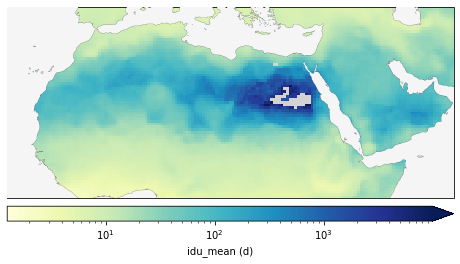

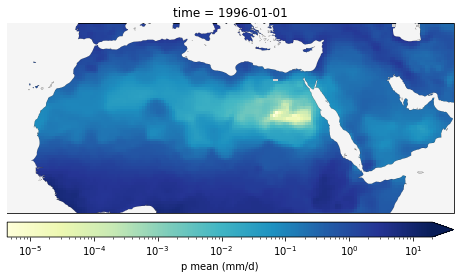

In [10]:
# idu mean
lvls = np.linspace(0,100,21)
lvls2 = np.linspace(0,100,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-22,60)
ax.set_ylim(5,40)
a = idu.idu_mean[:,:].plot(ax=ax, cmap='YlGnBu', add_colorbar=False,norm=mpl.colors.LogNorm())
cbar = plt.colorbar(a, orientation='horizontal', label='idu_mean (d)',spacing='proportional',extend='max', pad=0.02,aspect=30)
fig2.savefig(f'{out_dir}/gridded_sr/figures/idu_mean_sahara.jpg',bbox_inches='tight',dpi=300)

lvls = np.linspace(0,10,21)
lvls2 = np.linspace(0,10,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-22,60)
ax.set_ylim(5,40)
a = p.pr[:,:].plot(ax=ax, cmap='YlGnBu', add_colorbar=False,norm=mpl.colors.LogNorm())
cbar = plt.colorbar(a, orientation='horizontal', label='p mean (mm/d)',spacing='proportional',extend='max', pad=0.02,aspect=30)
fig2.savefig(f'{out_dir}/gridded_sr/figures/p_mean_sahara.jpg',bbox_inches='tight',dpi=300)

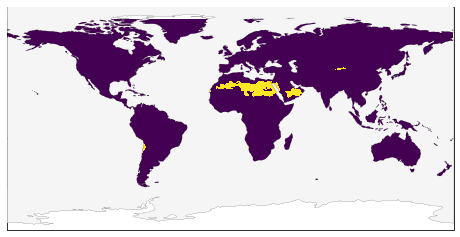

In [11]:
b = (idu.idu_mean[:,:]>100)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
# ax.set_xlim(-22,60)
# ax.set_ylim(5,40)
a = b.plot(add_colorbar=False)
fig2.savefig(f'{out_dir}/gridded_sr/figures/idu_mean_100.jpg',bbox_inches='tight',dpi=300)

In [12]:
# sahara
lat_min,lat_max=17,28
lon_min,lon_max=-5,12
i_s = idu.idu_mean[(idu.lat<lat_max)&(idu.lat>lat_min)]
i_s = i_s[:,250:415]

p_s = p.pr[0][(p.lat<lat_max)&(p.lat>lat_min)]
p_s = p_s[:,250:415]

t_s = t.tas[0][(t.lat<lat_max)&(t.lat>lat_min)]
t_s = t_s[:,250:415]

a_s = asi.asi[(asi.lat<lat_max)&(asi.lat>lat_min)]
a_s = a_s[:,250:415]

# cru T20 Lan
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_20yrs.nc')
l_s = l.sr_cru_20yrs[0][(l.lat<lat_max)&(l.lat>lat_min)]
l_s = l_s[:,250:415]

Text(0.5, 1.0, '')

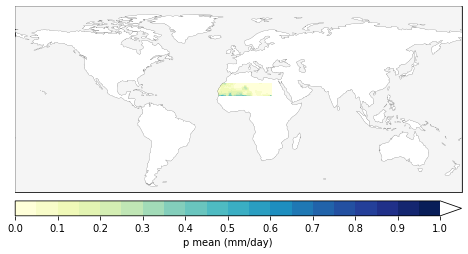

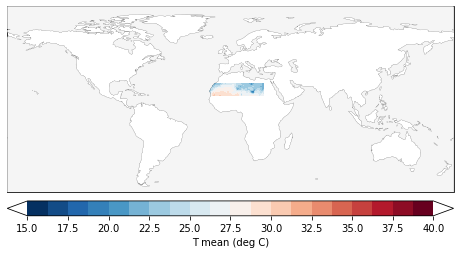

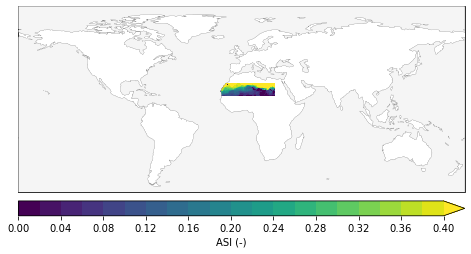

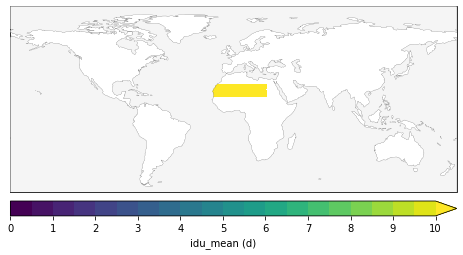

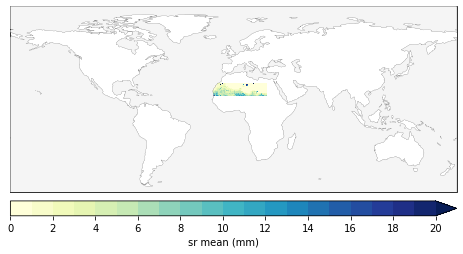

In [44]:
# p mean
lvls = np.linspace(0,1,21)
lvls2 = np.linspace(0,1,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = p_s[:,:].plot(ax=ax, cmap='YlGnBu',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='p mean (mm/day)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)
ax.set_title('')

# t mean
lvls = np.linspace(15,40,21)
lvls2 = np.linspace(15,40,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
t.tas[0,0,0] = -31
a = t_s[:,:].plot(ax=ax, cmap='RdBu_r',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='T mean (deg C)',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=lvls2)
ax.set_title('')

# asi
lvls = np.linspace(0,0.4,21)
lvls2 = np.linspace(0,0.4,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = a_s[:,:].plot(ax=ax, cmap='viridis',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='ASI (-)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)

# idu mean
lvls = np.linspace(0,10,21)
lvls2 = np.linspace(0,10,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = i_s[:,:].plot(ax=ax, cmap='viridis',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='idu_mean (d)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)

# sr lan
lvls = np.linspace(0,20,21)
lvls2 = np.linspace(0,20,11)
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = l_s[:,:].plot(ax=ax, cmap='YlGnBu',levels=lvls, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal', label='sr mean (mm)',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=lvls2)
ax.set_title('')

In [137]:
x=100
lat_random = np.random.choice(np.arange(0,len(l_s.lat),1), x, replace=True)
lon_random = np.random.choice(np.arange(0,len(l_s.lon),1), x, replace=True)

ldf = pd.DataFrame(index = np.arange(0,x,1),columns=['lat','lon','sr_20','p_mean','idu_mean','t_mean','asi'])#
for i in range(x):
    ldf['lon'][i] = l_s[lat_random[i],lon_random[i]].lon.values.astype(float).item()
    ldf['lat'][i] = l_s[lat_random[i],lon_random[i]].lat.values.astype(float).item()
    ldf['sr_20'][i] = l_s[lat_random[i],lon_random[i]].values.astype(float).item()
    # ldf['sr_20'][i] = 0.001
    if (ldf['sr_20'][i] == 0.0):
        ldf['sr_20'][i] = 0.001
    ldf['idu_mean'][i] = i_s[lat_random[i],lon_random[i]].values.astype(float).item()
    ldf['p_mean'][i] = p_s[lat_random[i],lon_random[i]].values.astype(float).item()
    ldf['t_mean'][i] = t_s[lat_random[i],lon_random[i]].values.astype(float).item()
    ldf['asi'][i] = a_s[lat_random[i],lon_random[i]].values.astype(float).item()
ldf = ldf.dropna()
ldf

lat   lon     sr_20    p_mean idu_mean     t_mean       asi
3   22.5 -13.5    4.3464  0.124194    88.71  26.411707  0.288287
6   26.5   7.0     12.31  0.041429   145.44  23.905413   0.37329
12  26.0  16.0     0.001  0.018095   301.22  23.140162  0.454435
14  18.0  18.0    5.7337  0.058402   121.66  28.213915       0.0
15  18.0  -4.5    5.8409   0.24585     33.7  29.348097  0.097637
19  18.5  22.0    7.9214  0.103642   122.64  27.533848  0.038291
20  22.5  -2.5    4.8129  0.121948    67.73  28.405685  0.177621
21  18.0  23.0    9.9297  0.141782    93.37  26.408333  0.029503
22  21.0  -7.0     4.876  0.186068    61.36  28.802328  0.125267
25  25.0  -4.0   0.40525  0.056107   147.18  27.255262  0.371987
27  23.0  19.5     0.001  0.009645   475.26  22.478964  0.219526
28  19.0  -6.5    5.5842   0.39544    32.04  29.464575  0.101518
30  22.5  25.5     0.001   0.00077   4842.5  22.698656  0.145418
32  22.5  23.5     0.001   0.00334   2421.0  24.678905  0.028507
35  18.0 -14.0    12.903  0.436426    33.87   29.90358  0.075879
36  20.5  15.0    7.8631  0.071223    73.92  26.117846  0.039928
38  18.5  18.0    4.5943  0.051213   150.87  27.682573  0.006532
39  23.5   0.5   0.52439  0.079962     97.2  27.801842  0.226437
40  21.5  -0.5    3.1796  0.150349    48.19  28.412039  0.128514
41  26.5   6.0     0.001  0.046958   130.84  23.828728  0.378365
42  23.0   9.5     0.001  0.026915   193.25  25.241329       0.0
43  22.5  20.0     0.001  0.005629   779.71  23.599058  0.256268
46  20.0  16.0    4.9476  0.086583    65.74   25.69762       0.0
48  25.0  -3.5  0.026136  0.041807   168.08  27.358982  0.352266
49  26.0  12.0     0.001  0.022868   200.37  23.566717  0.394545
52  22.0  26.0     0.001  0.000619   9686.0  23.560583  0.051529
53  18.5  -4.5    5.2422  0.185059     47.6  29.244324  0.119924
55  18.0  25.5     6.398  0.301221    56.32  27.054296       0.0
56  20.5  10.0   0.48706  0.130494    59.34  26.946676  0.073872
57  21.0   8.5   0.38014  0.147152    52.86  26.215174  0.097641
60  24.5  23.0   0.14514   0.00262  1586.33  23.444851  0.347133
63  19.0   0.0    3.9861  0.266318    23.09  29.229378  0.042383
65  24.0   3.0     0.001  0.113882    66.72  26.455711  0.177191
70  23.0  26.0     0.001  0.000922  2421.25  21.951479  0.159739
71  23.0  -0.5     1.841  0.098248     86.8  28.187416  0.191644
72  23.5   1.0   0.25908  0.080824   102.89  27.581478  0.233255
73  27.0 -11.0    1.5484  0.241731    36.93  23.433481   0.43632
74  26.0  25.5     0.001  0.002271   1159.2  22.365824  0.489341
77  26.5 -11.5    1.1028  0.158029    46.31  23.826513  0.421498
79  21.5   2.0    3.7279  0.139083    50.38  27.709143   0.15636
81  26.5  25.0     0.001  0.008371    469.9  22.660662  0.509843
82  24.5  24.0     0.001   0.00232   1481.5  23.433706  0.301094
83  17.5  12.5    8.5324  0.062286    83.62  27.427063  0.057407
86  23.5  11.5     0.001  0.022792   292.78  23.720989  0.146725
87  24.5  24.5    27.402  0.002435   1937.2  23.128782   0.26434
89  27.0  -3.5     0.001  0.057924   127.62  25.512991   0.38507
90  22.0   4.5    3.0706  0.140639    49.13  26.396881  0.155981
92  19.5  12.5    1.6134  0.036551   194.82  26.920658  0.086455
97  19.5  22.5    7.0648   0.05297   275.67  26.162937  0.082501
98  25.0  -3.5  0.026136  0.041807   168.08  27.358982  0.352266

## Apply RF to gridded data

In [83]:
min_samples_leaf=1
max_depth=None
data_sources = 'gswp-p_gleam-ep_gswp-t'
# data_sources = 'gswp-p_hs-ep_gswp-t'

In [84]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
df['catch_id'] = df.index
features = ['idu_mean','t_mean','asi','p_mean']#,'lai_mean']

In [85]:
# central australia points in desert
# df[(df.lon>120)&(df.lon<145)&(df.lat>-30)&(df.lat<-21)]

In [86]:
# # oman and namibia points
# df.loc[['om_0000002','na_0000048'],['idu_mean','t_mean','asi','p_mean','sr_20','lat','lon']]

In [87]:
# adf = pd.DataFrame(columns=df.columns)
# for i in range(50):
#     adf.loc[i]= df.loc['om_0000002'] # copy this catchment 50x to represent better dry catchments
# for i in range(50):
#     adf.loc[i+50]= df.loc['na_0000048']
# df = pd.concat([df,adf])
# # # df

# df = pd.concat([df,ldf])
# df

In [88]:
# features = ['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd']
sr_rp = 'sr_20'
ll = ['lat','lon','catch_id']
f = features + ll
dfx = df[f].values
dfy = df[sr_rp].values

# here split dataset into 'temp' and 'test'
cv_outer = 5 # the number of outer cross validations
sdf = pd.DataFrame(index=range(cv_outer), columns=['n_estimators','max_depth','min_samples_leaf','max_features','train_mae','train_r2_adj','test_mae','test_r2_adj','n_train','n_test','fold'])
l = []
train_dfs=[]
test_dfs=[]

kf = KFold(n_splits=cv_outer,shuffle=True,random_state=0)
df = dfy.reshape(-1, 1).ravel()
i=0
cv_train_ix = []
cv_test_ix = []
ddl = []
for train_ix, test_ix in kf.split(dfx):
    cv_train_ix.append(train_ix)
    cv_test_ix.append(test_ix)
    X = dfx[train_ix]
    y = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix] 
    
    # save lat lon columns
    lat_train = X[:,-3]
    lon_train = X[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X[:,-1]
    catch_id_test = X_test[:,-1]

    # remove lat lon catchid columns
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X = np.delete(X,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)  
    
    # run rf model with full 'temp' set and test set using the best inner cross validation
    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,max_depth=max_depth,min_samples_leaf=min_samples_leaf,oob_score=True)
    rf.fit(X,y)
    test_y_pred = rf.predict(X_test)
    train_y_pred = rf.predict(X)
    n_train,n_test = len(y),len(y_test)

    train_mae = np.round(mean_absolute_error(y, train_y_pred),2)
    # train_r2_adj =  np.round(r2_adj(y, train_y_pred,features),2)

    test_mae = np.round(mean_absolute_error(y_test, test_y_pred),2)
    # test_r2_adj = np.round(r2_adj(y_test, test_y_pred,features),2)
    
    perm_importance = permutation_importance(rf, X_test, y_test,scoring='neg_mean_absolute_error',random_state=42)
    # perm_importance = permutation_importance(rf, X_train, y_test,scoring='neg_mean_absolute_error',random_state=42)
    pi = perm_importance.importances_mean
    dd = pd.DataFrame(index=features,columns=['pi'])
    dd.pi = pi
    ddl.append(dd)
    
    df_train = pd.DataFrame(index=catch_id_train,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_train['lat'] = lat_train
    df_train['lon'] = lon_train
    df_train['Sr_m'] = y
    df_train['Sr_p'] = train_y_pred
    df_train['Sr_p-Sr_m'] = train_y_pred - y
    df_train['(Sr_p-Sr_m)/Sr_m'] = (train_y_pred - y)/train_y_pred
    train_dfs.append(df_train)

    df_test = pd.DataFrame(index=catch_id_test,columns=['lat','lon','Sr_m','Sr_p','Sr_p-Sr_m','(Sr_p-Sr_m)/Sr_m'])
    df_test['lat'] = lat_test
    df_test['lon'] = lon_test
    df_test['Sr_m'] = y_test
    df_test['Sr_p'] = test_y_pred
    df_test['Sr_p-Sr_m'] = test_y_pred - y_test
    df_test['(Sr_p-Sr_m)/Sr_m'] = (test_y_pred - y_test)/test_y_pred
    test_dfs.append(df_test)

    i+=1

test_dfs = pd.concat(test_dfs)
train_dfs = pd.concat(train_dfs)


# sdf.to_csv(f'{work_dir}/cross_validation/output/sdf_kinner{cv_inner}_kouter{cv_outer}_var{len(features)}_v2.csv')

In [89]:
p = xr.open_dataset(f'{work_dir}/output/gridded_sr/p_mean_gswp3_land.nc')
t = xr.open_dataset(f'{work_dir}/output/gridded_sr/t_mean_gswp3_land.nc')
idu = xr.open_dataset(f'{work_dir}/output/gridded_sr/idu_mean_land.nc')
asi = xr.open_dataset(f'{work_dir}/output/gridded_sr/asi_land.nc')
# lai = xr.open_dataset(f'{work_dir}/output/gridded_sr/lai_mean_land.nc')

p_array = p.pr.to_numpy().flatten()
t_array = t.tas.to_numpy().flatten()
asi_array = asi.asi.to_numpy().flatten()
idu_array = idu.idu_mean.to_numpy().flatten()
# lai_array = lai.LAI.to_numpy().flatten()

lat_array = []
lon_array = []
for m in range(len(p.lat.values)):
    for n in range(len(p.lon.values)):
        lat_array.append(p.lat.values[m])
        lon_array.append(p.lon.values[n])

In [90]:
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon']]
df = df.dropna()
features = ['p_mean','t_mean', 'asi','idu_mean']#,'lai_mean']

# adf = pd.DataFrame(columns=df.columns)
# for i in range(50):
#     adf.loc[i]= df.loc['om_0000002'] # copy this catchment 50x to represent better dry catchments
# for i in range(50):
#     adf.loc[i+50]= df.loc['na_0000048']
# df = pd.concat([df,adf])
# # df = pd.concat([df,ldf])

dfs=[]

for i in range(5):
    sr_rp = 'sr_20'
    df['catch_id'] = df.index
    ll = ['lat','lon','catch_id']
    f = features + ll
    dfx = df[f].values
    dfy = df[sr_rp].values
    train_ix = cv_train_ix[i]
    test_ix = cv_test_ix[i]

    # X_train, X_test, y_train, y_test = train_test_split(dfx, dfy.reshape(-1, 1).ravel(), test_size=0.3, random_state=42)
    X_train = dfx[train_ix]
    y_train = dfy[train_ix]
    X_test = dfx[test_ix]
    y_test = dfy[test_ix]

    # save lat lon columns
    lat_train = X_train[:,-3]
    lon_train = X_train[:,-2]
    lat_test = X_test[:,-3]
    lon_test = X_test[:,-2]
    catch_id_train = X_train[:,-1]
    catch_id_test = X_test[:,-1]
    # remove lat lon columns
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_train = np.delete(X_train,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)
    X_test = np.delete(X_test,-1,1)

    rf = RandomForestRegressor(criterion='absolute_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    # rf = RandomForestRegressor(criterion='squared_error',random_state=42,min_samples_leaf=min_samples_leaf,max_depth=max_depth,oob_score=True)
    rf = rf.fit(X_train, y_train)
    train_y_pred = rf.predict(X_train)
    
    dfg = pd.DataFrame(index=np.arange(0,195840,1), columns=['lat','lon','p_mean','t_mean','asi','idu_mean'])#,'lai_mean'])
    dfg.loc[:,'lat'] = lat_array
    dfg.loc[:,'lon'] = lon_array
    dfg.loc[:,'p_mean'] = p_array
    dfg.loc[:,'t_mean'] = t_array
    dfg.loc[:,'asi'] = asi_array
    dfg.loc[:,'idu_mean'] = idu_array
    # dfg.loc[:,'lai_mean'] = lai_array
    dfg = dfg.dropna()
    
    dfx = dfg[features].values
    test_y_pred = rf.predict(dfx)
    dfg['sr_pred'] = test_y_pred
    dfs.append(dfg)

In [91]:
df0 = dfs[0]
df1 = dfs[1]
df2 = dfs[2]
df3 = dfs[3]
df4 = dfs[4]

In [92]:
dfp = pd.DataFrame(index=np.arange(0,195840,1), columns=['lat','lon','sr_p0','sr_p1','sr_p2','sr_p3','sr_p4'])
dfp.loc[:,'lat'] = lat_array
dfp.loc[:,'lon'] = lon_array
dfp['sr_p0'] = df0['sr_pred']
dfp['sr_p1'] = df1['sr_pred']
dfp['sr_p2'] = df2['sr_pred']
dfp['sr_p3'] = df3['sr_pred']
dfp['sr_p4'] = df4['sr_pred']
dfp['sr_p_mean'] = dfp[['sr_p0','sr_p1','sr_p2','sr_p3','sr_p4']].mean(axis=1)
dfp['sr_p_std'] = dfp[['sr_p0','sr_p1','sr_p2','sr_p3','sr_p4']].std(axis=1)
dfp['sr_p_sm'] = dfp['sr_p_std']/dfp['sr_p_mean']
dfp

lat    lon  sr_p0  sr_p1  sr_p2  sr_p3  sr_p4  sr_p_mean  sr_p_std  \
0       80.0 -180.0    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
1       80.0 -179.5    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
2       80.0 -179.0    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
3       80.0 -178.5    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
4       80.0 -178.0    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
...      ...    ...    ...    ...    ...    ...    ...        ...       ...   
195835 -55.5  177.5    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
195836 -55.5  178.0    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
195837 -55.5  178.5    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
195838 -55.5  179.0    NaN    NaN    NaN    NaN    NaN        NaN       NaN   
195839 -55.5  179.5    NaN    NaN    NaN    NaN    NaN        NaN       NaN   

        sr_p_sm  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
...         ...  
195835      NaN  
195836      NaN  
195837      NaN  
195838      NaN  
195839      NaN  

[195840 rows x 10 columns]

In [93]:
# dataframe to 2d xarray
# mean
srp = np.zeros([len(p.lat.values),len(p.lon.values)])
i=0
for n in range(len(p.lat.values)):
    for m in range(len(p.lon.values)):
        srp[n,m] = dfp['sr_p_mean'][i]
        i+=1
lon = p.lon.values
lat = p.lat.values
data_xr_mean = xr.DataArray(srp,
                       coords={'lat':lat,'lon':lon},
                       dims=['lat','lon'],
                       name='sr_p')

# std
srp = np.zeros([len(p.lat.values),len(p.lon.values)])
i=0
for n in range(len(p.lat.values)):
    for m in range(len(p.lon.values)):
        srp[n,m] = dfp['sr_p_std'][i]
        i+=1
lon = p.lon.values
lat = p.lat.values
data_xr_std = xr.DataArray(srp,
                       coords={'lat':lat,'lon':lon},
                       dims=['lat','lon'],
                       name='sr_p')

# std/mean
srp = np.zeros([len(p.lat.values),len(p.lon.values)])
i=0
for n in range(len(p.lat.values)):
    for m in range(len(p.lon.values)):
        srp[n,m] = dfp['sr_p_sm'][i]
        i+=1
lon = p.lon.values
lat = p.lat.values
data_xr_sm = xr.DataArray(srp,
                       coords={'lat':lat,'lon':lon},
                       dims=['lat','lon'],
                       name='sr_p')

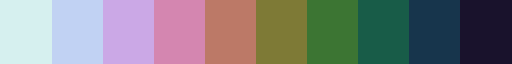

In [94]:
import matplotlib
cmap = cm.get_cmap('cubehelix_r', 12)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_rdbu = ListedColormap(color_list[1:-1])
cmap_rdbu.set_over(color_list[-1])
cmap_rdbu.set_under(color_list[0])
cmap_rdbu.set_bad('lightgrey')
cmap_rdbu

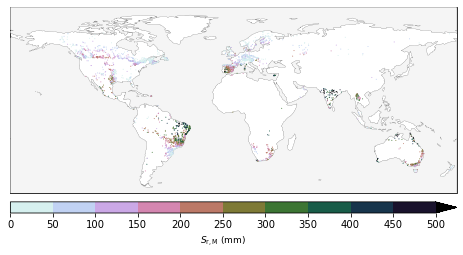

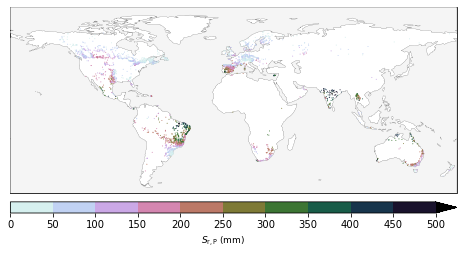

In [95]:
# sr memory method maps
cmap_rdbu1 = cm.get_cmap('cubehelix_r', 13)
cmap_rdbu1 = cmap_rdbu
bounds = np.linspace(0,500,11)
bounds2 = bounds
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu1.N)

fig2 = plt.figure(figsize=(8,8))
# plt.subplots_adjust(wspace=0000.1,hspace=-0.4)
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.7,c=test_dfs['Sr_m'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
# cbar = plt.colorbar(s, orientation='vertical',spacing='proportional',extend='both', pad=0.02,aspect=15, norm=norm,shrink=0.35)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
cbar.set_label('$S_\mathrm{r,M}$ (mm)',size=9)
# cbar.set_ticklabels(['0','','100','','200','','300','','400','','500'],size=9)
cbar.set_ticks(bounds)
# ax.set_title('(a)',size=9,loc='left')
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_m_points.jpg',bbox_inches='tight',dpi=300)

fig2 = plt.figure(figsize=(8,8))
# plt.subplots_adjust(wspace=0000.1,hspace=-0.4)
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.7,c=test_dfs['Sr_p'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
# cbar = plt.colorbar(s, orientation='vertical',spacing='proportional',extend='both', pad=0.02,aspect=15, norm=norm,shrink=0.35)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
cbar.set_label('$S_\mathrm{r,P}$ (mm)',size=9)
# cbar.set_ticklabels(['0','','100','','200','','300','','400','','500'],size=9)
cbar.set_ticks(bounds)
# ax.set_title('(a)',size=9,loc='left')
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_points.jpg',bbox_inches='tight',dpi=300)

# # Northamerica only
# fig2 = plt.figure(figsize=(8,8))
# # plt.subplots_adjust(wspace=0000.1,hspace=-0.4)
# ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
# ax.coastlines(linewidth=0.1)
# ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
# ax.set_global()
# ax.set_xlim(-130,-50)
# ax.set_ylim(10,90)
# s=ax.scatter(test_dfs.lon,test_dfs.lat,s=4.7,c=test_dfs['Sr_m'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
# # cbar = plt.colorbar(s, orientation='vertical',spacing='proportional',extend='both', pad=0.02,aspect=15, norm=norm,shrink=0.35)
# cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
# cbar.set_label('$S_\mathrm{r,M}$ (mm)',size=9)
# cbar.set_ticklabels(['0','','100','','200','','300','','400','','500'],size=9)
# cbar.set_ticks(bounds)
# # ax.set_title('(a)',size=9,loc='left')
# fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_m_points_northamerica.jpg',bbox_inches='tight',dpi=300)

# fig2 = plt.figure(figsize=(8,8))
# # plt.subplots_adjust(wspace=0000.1,hspace=-0.4)
# ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
# ax.coastlines(linewidth=0.1)
# ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
# ax.set_global()
# ax.set_xlim(-130,-50)
# ax.set_ylim(10,90)
# s=ax.scatter(test_dfs.lon,test_dfs.lat,s=4.7,c=test_dfs['Sr_p'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
# # cbar = plt.colorbar(s, orientation='vertical',spacing='proportional',extend='both', pad=0.02,aspect=15, norm=norm,shrink=0.35)
# cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
# cbar.set_label('$S_\mathrm{r,P}$ (mm)',size=9)
# cbar.set_ticklabels(['0','','100','','200','','300','','400','','500'],size=9)
# cbar.set_ticks(bounds)
# # ax.set_title('(a)',size=9,loc='left')
# fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_points_northamerica.jpg',bbox_inches='tight',dpi=300)


In [96]:
# mask output
data_xr_mean = data_xr_mean.where(pl[0,:,:]>=0)

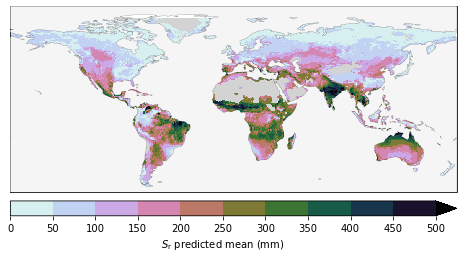

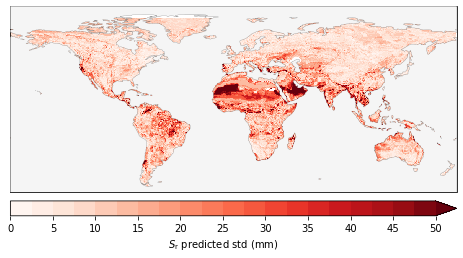

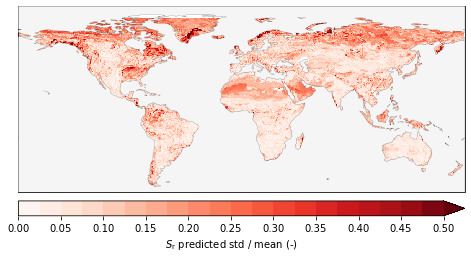

In [97]:
# sr predicted mean
# from cmcrameri import cm
# cmap_rdbu = cm.cubehelix_r
# cmap_rdbu = cm.get_cmap('viridis')
bounds = np.linspace(0, 500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_mean[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_mean.jpg',bbox_inches='tight',dpi=300)

# standard deviation
from matplotlib import cm
cmap_rdbu1 = cm.get_cmap('Reds')
bounds = np.linspace(0,50,21)
bounds2 = np.linspace(0,50,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu1.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_std[:,:].plot(ax=ax, cmap=cmap_rdbu1,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted std (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_std.jpg',bbox_inches='tight',dpi=300)


# relative standard deviation
bounds = np.linspace(0,0.5,21)
bounds2 = np.linspace(0,0.5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu1.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_sm[:,:].plot(ax=ax, cmap=cmap_rdbu1,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted std / mean (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_std_mean.jpg',bbox_inches='tight',dpi=300)


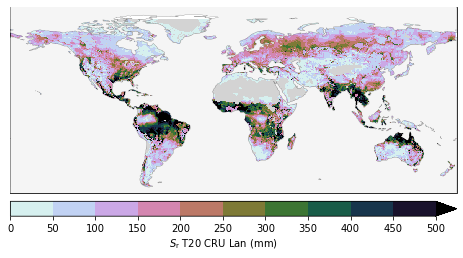

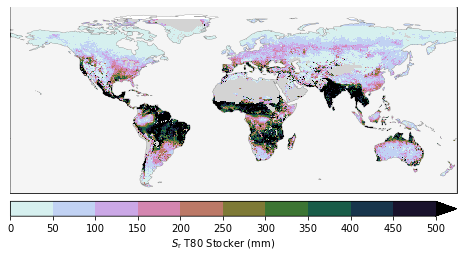

In [36]:
# sr reference
# from cmcrameri import cm
# cmap_rdbu = cm.batlow_r
# cmap_rdbu = cm.get_cmap('viridis')
bounds = np.linspace(0, 500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

# cru T20 Lan
l = xr.open_dataset(f'{work_dir}/data/reference_sr/lan/sr_cru_20yrs.nc')
l = l.sr_cru_20yrs[0]
l = l.where(pl[0,:,:]>=0)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = l.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T20 CRU Lan (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_lan_t20.jpg',bbox_inches='tight',dpi=300)


# stocker T80
s = xr.open_dataset(f'{work_dir}/data/reference_sr/stocker/cwdx80_cru_grid.nc')
s = s.cwdx80
s = s.where(pl[0,:,:]>=0)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = s.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T80 Stocker (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_stocker_t80.jpg',bbox_inches='tight',dpi=300)


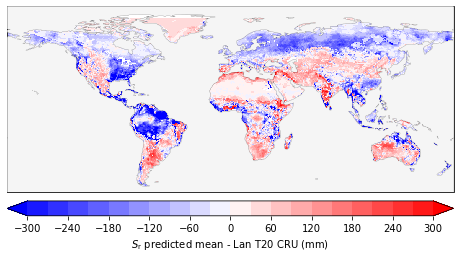

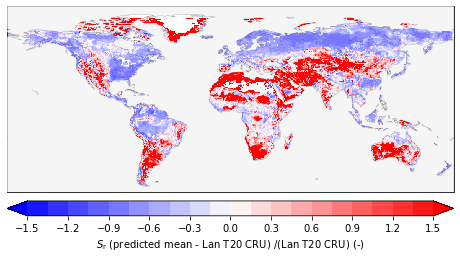

In [153]:
# sr differences
from matplotlib import cm

# lan vs predicted abs
cmap_rdbu = cm.get_cmap('bwr')
bounds = np.linspace(-300,300,21)
bounds2 = np.linspace(-300,300,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

lp = data_xr_mean[:,:]-l
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lp.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Lan T20 CRU (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_lan_abs.jpg',bbox_inches='tight',dpi=300)

# lan vs predicted rel
bounds = np.linspace(-1.5,1.5,21)
bounds2 = np.linspace(-1.5,1.5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)
lpr = (data_xr_mean[:,:]-l)/l
lpr[0,0]=-1.6
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpr.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ (predicted mean - Lan T20 CRU) /(Lan T20 CRU) (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_lan_rel.jpg',bbox_inches='tight',dpi=300)


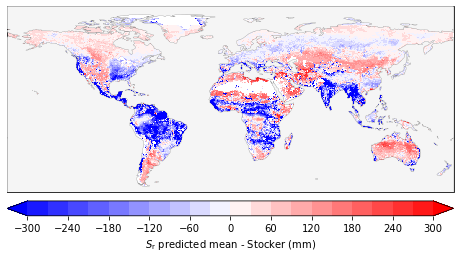

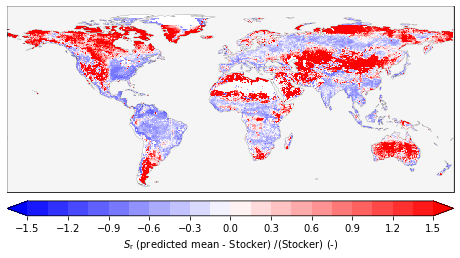

In [95]:
# stocker vs predicted abs
cmap_rdbu = cm.get_cmap('bwr')
bounds = np.linspace(-300,300,21)
bounds2 = np.linspace(-300,300,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

lp = data_xr_mean[:,:]-s
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lp.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Stocker (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_stocker_abs.jpg',bbox_inches='tight',dpi=300)

# lan vs predicted rel
bounds = np.linspace(-1.5,1.5,21)
bounds2 = np.linspace(-1.5,1.5,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)
lpr = (data_xr_mean[:,:]-s)/s
lpr[0,0]=-1.6
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpr.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ (predicted mean - Stocker) /(Stocker) (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_stocker_rel.jpg',bbox_inches='tight',dpi=300)

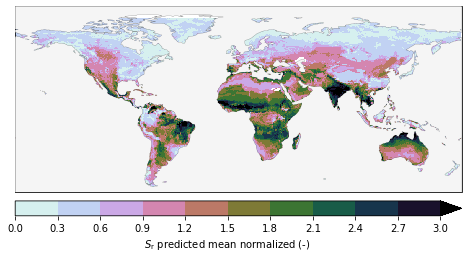

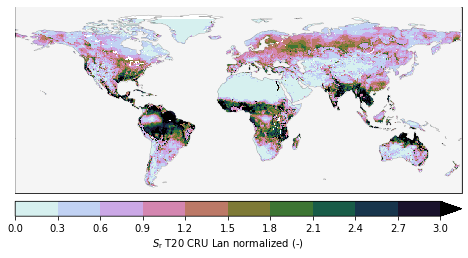

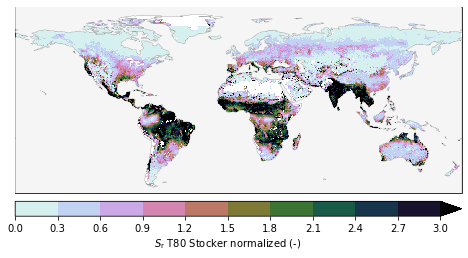

In [98]:
# NORMALIZED
data_xr_mean_n = data_xr_mean[:,:]/data_xr_mean.mean()
ln = l/l.mean()
sn = s/s.mean()

cmap = cm.get_cmap('cubehelix_r', 12)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
cmap_rdbu = ListedColormap(color_list[1:-1])
cmap_rdbu.set_over(color_list[-1])
cmap_rdbu.set_under(color_list[0])

bounds = np.linspace(0,3,11)
bounds2 = np.linspace(0,3,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = data_xr_mean_n[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean normalized (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_mean_normalized.jpg',bbox_inches='tight',dpi=300)

# sr reference
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = ln.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T20 CRU Lan normalized (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_lan_t20_normalized.jpg',bbox_inches='tight',dpi=300)


# stocker T80
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = sn.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ T80 Stocker normalized (-)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_stocker_t80_normalized.jpg',bbox_inches='tight',dpi=300)

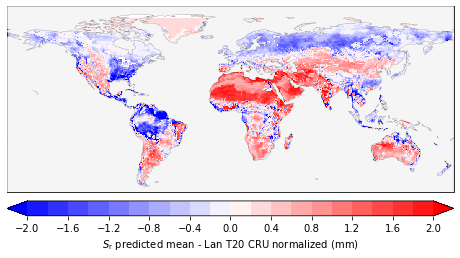

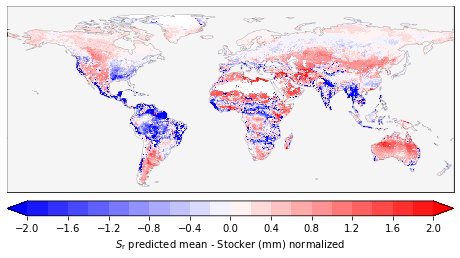

In [99]:
# normalized differences
from matplotlib import cm
# stocker vs predicted abs
cmap_rdbu = cm.get_cmap('bwr')
bounds = np.linspace(-2,2,21)
bounds2 = np.linspace(-2,2,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

lpn = data_xr_mean_n - ln
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpn.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Lan T20 CRU normalized (mm)', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_lan_abs_normalized.jpg',bbox_inches='tight',dpi=300)

lpn = data_xr_mean_n - sn
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_xlim(-180,180)
ax.set_ylim(-60,90)
a = lpn.plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
#ax.plot([lon[526],lon[526]],[-60,90],'k--',zorder=101)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='both', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean - Stocker (mm) normalized', size=10)
ax.set_title('',size=14)
fig2.savefig(f'{out_dir}/gridded_sr/figures/srdiff_stocker_abs_normalized.jpg',bbox_inches='tight',dpi=300)


In [173]:
ls = pd.read_csv(f'{work_dir}/output/sr_calculation/stocker_lan_sr_df.csv',index_col=0)
ls

stocker_cwd80x_mm  stocker_zroot_cwd80x_mm  lan_chirps_2yrs  \
us_0005238         159.837230               2605.74300         95.89767   
us_0007161         118.818214               2095.28030         40.05659   
ca_0000031          73.520400                694.12560         65.52100   
dk_0000031          84.847350               1134.98300              NaN   
br_0000991         289.209080               5669.33540        230.77000   
...                       ...                      ...              ...   
ca_0003991         128.740520               2496.19340              NaN   
401012             375.361500               8233.64200        143.07642   
ca_0001655          38.279820                233.67606              NaN   
br_0000180         533.565860              10531.50000        313.36786   
fr_0000841         115.433840               2153.81050              NaN   

            lan_chirps_5yrs  lan_chirps_10yrs  lan_chirps_20yrs  \
us_0005238        129.23041        151.299120         172.46790   
us_0007161         56.22306         66.926735          77.19376   
ca_0000031         94.49700        113.680000         132.08000   
dk_0000031              NaN               NaN               NaN   
br_0000991        247.27000        258.190000         268.67000   
...                     ...               ...               ...   
ca_0003991              NaN               NaN               NaN   
401012            222.15471        274.509900         324.72960   
ca_0001655              NaN               NaN               NaN   
br_0000180        353.86923        380.682220         406.40674   
fr_0000841              NaN               NaN               NaN   

            lan_chirps_30yrs  lan_chirps_40yrs  lan_chirps_50yrs  \
us_0005238         184.64053         193.23337         199.86298   
us_0007161          83.10073          87.26388          90.48266   
ca_0000031         142.67000         150.13000         155.90000   
dk_0000031               NaN               NaN               NaN   
br_0000991         274.70000         278.95000         282.24000   
...                      ...               ...               ...   
ca_0003991               NaN               NaN               NaN   
401012             353.62780         373.99400         389.74356   
ca_0001655               NaN               NaN               NaN   
br_0000180         421.20360         431.63345         439.69946   
fr_0000841               NaN               NaN               NaN   

            lan_chirps_60yrs  lan_chirps_max  lan_cru_2yrs  lan_cru_5yrs  \
us_0005238        205.276000       150.51936     78.888130     105.43828   
us_0007161         93.108185        66.14288     22.652782      34.09864   
ca_0000031        160.610000       101.64000     50.053000      72.51600   
dk_0000031               NaN             NaN     71.768500      99.18417   
br_0000991        284.920000       253.55000    172.380000     205.07000   
...                      ...             ...           ...           ...   
ca_0003991               NaN             NaN    112.079670     150.38084   
401012            402.578060       279.32780    142.786580     199.07700   
ca_0001655               NaN             NaN           NaN           NaN   
br_0000180        446.272980       366.47122    349.527920     439.70868   
fr_0000841               NaN             NaN     91.257000     128.09000   

            lan_cru_10yrs  lan_cru_20yrs  lan_cru_30yrs  lan_cru_40yrs  \
us_0005238     123.017940     139.880940     149.580750      156.42395   
us_0007161      41.676865      48.946133      53.127945       56.07632   
ca_0000031      87.389000     101.650000     109.860000      115.65000   
dk_0000031     117.337120     134.742070     144.760160      151.82576   
br_0000991     226.710000     247.470000     259.420000      267.84000   
...                   ...            ...            ...            ...   
ca_0003991     175.743970     200.065500     214.058620   

## plot timeseries US catchments

In [247]:
def plot_timeseries(cid,lat_min,lat_max,lon_min,lon_max,df,data_sources):
    ls = pd.read_csv(f'{work_dir}/output/sr_calculation/stocker_lan_sr_df.csv',index_col=0)
    sr_lan = int(ls.loc[cid].lan_cru_20yrs)
    sr_s = int(ls.loc[cid].stocker_cwd80x_mm)

    fig = plt.figure(figsize=(18,7))
    gs = fig.add_gridspec(ncols=2, nrows=3,height_ratios=[1,1,1],width_ratios=[2.5,1])
    ax1 = fig.add_subplot(gs[0,0])
    ax2= fig.add_subplot(gs[1,0])
    ax3= fig.add_subplot(gs[2,0])
    ax4 = fig.add_subplot(gs[:,1],projection=ccrs.PlateCarree())
    plt.subplots_adjust(wspace=0.09)
    
    ts = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments_{data_sources}/sd/{cid}.csv',index_col=0)
    ts.index = pd.to_datetime(ts.index)
    if (data_sources=='gswp-p_gleam-ep_gswp-t'):
        ts2 = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sd/{cid}.csv',index_col=0)
        ts2.index = pd.to_datetime(ts2.index)   
        sr_noirri = pd.read_csv(f'{work_dir}/output/sr_calculation/sd_catchments/no_irri/sr_no_irri_combined_gumbelfit_rzyear.csv',index_col=0)
        srni = int(sr_noirri.loc[cid]['20.0'])
        ax1.plot(ts2.index,ts2.Sd,label='Sd no irri (mm)')
    else:
        srni=np.nan
    srp = int(test_dfs.loc[cid]['Sr_p'])
    
    if ('sd2' in ts.columns):
        ax1.plot(ts.index,ts.sd2,label='Sd irri (mm)')
    else:
        ax1.plot(ts.index,ts.Sd,label='Sd irri (mm)')
    ax1.set_title(f'Sr-M: {int(df.loc[cid].sr_20)} mm, Sr no irri: {srni} mm, Sr-p: {srp} mm, p_mean={np.round(df.loc[cid].p_mean,2)} mm/d, q_mean={np.round(df.loc[cid].q_mean,2)} mm/d',size=12)
    ax1.legend(fontsize=12)
    ax1.tick_params(labelsize=12)
    ax1.set_xlim(ts.index[600],ts.index[1800])

    ax2.plot(ts.index,ts.ep, label='Ep (mm/d)')
    ax2.plot(ts.index,ts.Et, label='Et (mm/d)')
    ax2.legend(fontsize=12)
    ax2.tick_params(labelsize=12)
    ax2.set_xlim(ts.index[0],ts.index[1800])
    
    tsm = ts.groupby(pd.Grouper(freq="M")).mean()
    tsmm = tsm.groupby([tsm.index.month]).mean()
    # print(tsmm)
    ax3.plot(tsmm.index,tsmm.p, label='P (mm/d)')
    ax3.plot(tsmm.index,tsmm.ep, label='Ep (mm/d)')
    ax3.legend(fontsize=12)
    ax3.tick_params(labelsize=12)
    # ax3.set_xlim(ts.index[0],ts.index[1800])
    
    bounds = np.linspace(0,500,11)
    norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu1.N)
    ax4.coastlines(linewidth=0.1)
    ax4.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
    ax4.set_global()
    ax4.set_ylim(lat_min,lat_max)
    ax4.set_xlim(lon_min,lon_max)
    # ax4.plot(df.lon,df.lat,'ko',zorder=101)
    s=ax4.scatter(df.lon,df.lat,c=df['sr_20'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap_rdbu1,norm=norm,zorder=102)
    cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)
    ax4.plot(df.loc[cid].lon,df.loc[cid].lat,'rx',zorder=103)
    ax4.text(lon_min+0.5,lat_max-1,f'Sr-m: {int(df.loc[cid].sr_20)} mm',size=11)
    ax4.text(lon_min+0.5,lat_max-2,f'Sr-p: {srp} mm',size=11)
    ax4.text(lon_min+0.5,lat_max-3,f'Sr Lan: {sr_lan} mm',size=11)
    ax4.text(lon_min+0.5,lat_max-4,f'Sr Stocker: {sr_s} mm',size=11)
    ax4.text(lon_min+0.5,lat_max-5,f'T-mean: {int(df.loc[cid].t_mean)} degC',size=11)
    ax4.text(lon_min+0.5,lat_max-6,f'P-mean: {np.round(df.loc[cid].p_mean,2)} mm/d',size=11)
    ax4.text(lon_min+0.5,lat_max-7,f'I_AS: {np.round(df.loc[cid].asi,2)}',size=11)
    ax4.text(lon_min+0.5,lat_max-8,f't_IS: {np.round(df.loc[cid].idu_mean,2)} d',size=11)
    ax4.text(lon_min+0.5,lat_max-9,f'irri_area: {np.round(df.loc[cid].ia,2)}',size=11)
    
    fig.savefig(f'{work_dir}/output/figures/sr_comparison/us_timeseries/{cid}_{data_sources}.jpg',bbox_inches='tight',dpi=300)

In [248]:
# data_sources = 'mswep-p_gleam-ep_gswp-t'
data_sources = 'gswp-p_hs-ep_gswp-t'
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df.drop(columns=['ppd_l'])
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon','q_mean']]
df = df.dropna()

lat_min,lat_max= 25,41
lon_min,lon_max= -92,-75

df = df[(df.lat<lat_max)&(df.lat>lat_min)&(df.lon>lon_min)&(df.lon<lon_max)]
# df

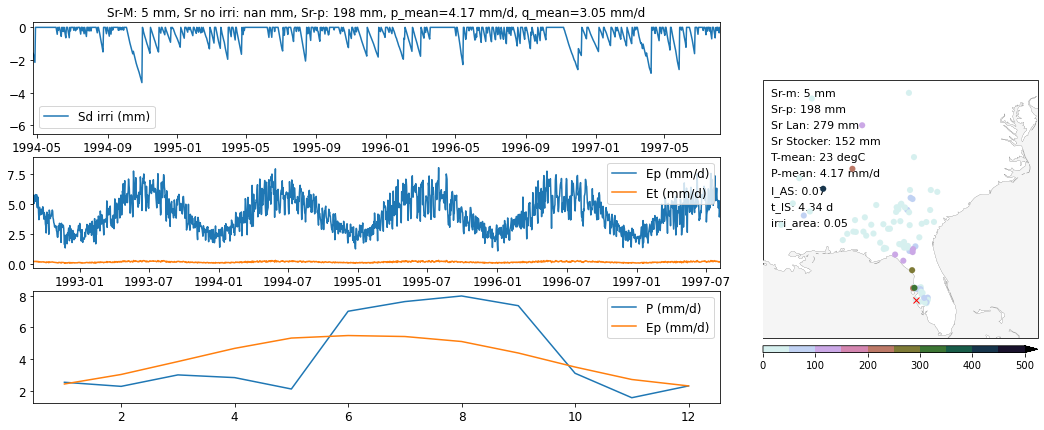

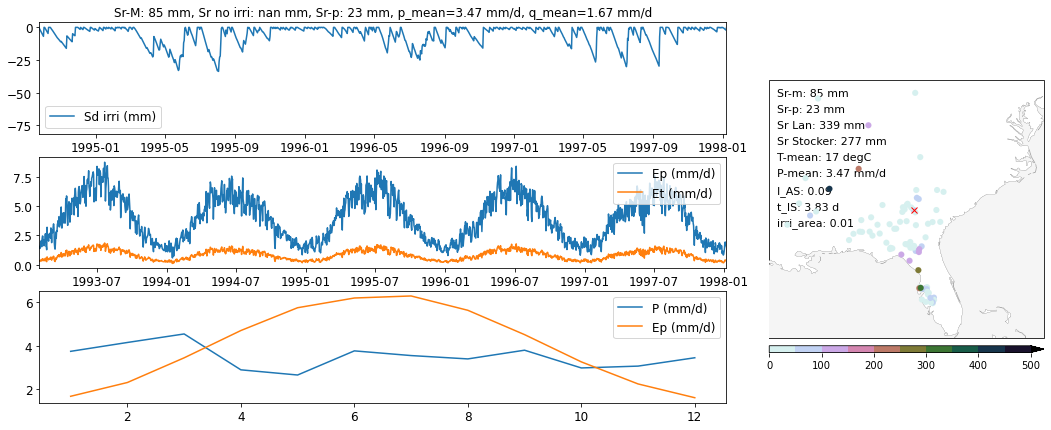

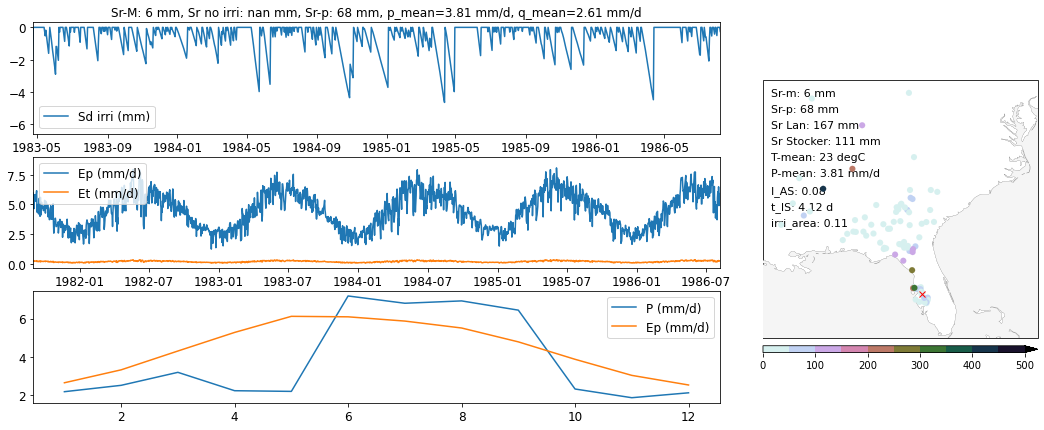

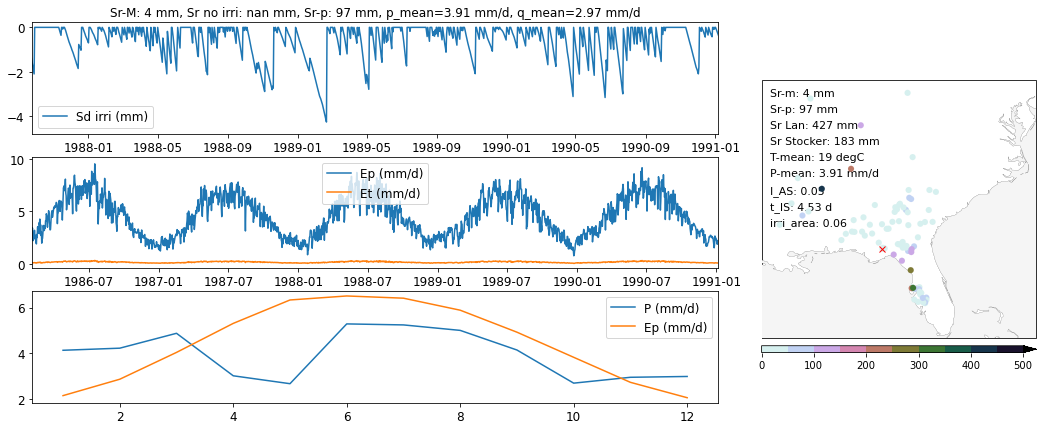

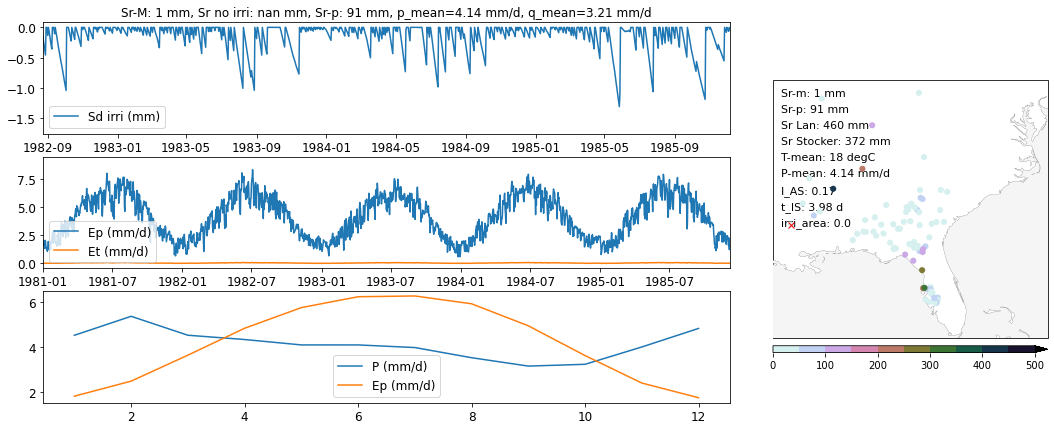

In [249]:
for cid in df.index[0:5]:
    plot_timeseries(cid,lat_min,lat_max,lon_min,lon_max,df,data_sources)

Text(0.5, 1.0, '')

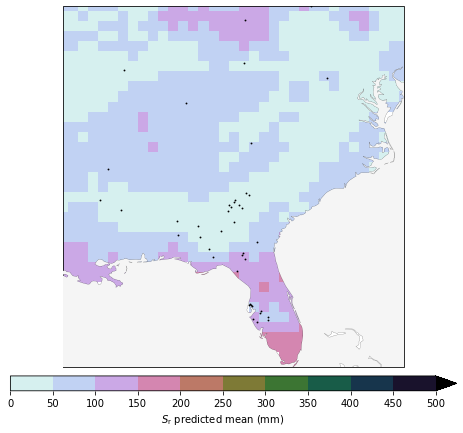

In [65]:
lat_min,lat_max= 25,43
lon_min,lon_max= -92,-75

# sr predicted north america
bounds = np.linspace(0, 500,11)
bounds2 = np.linspace(0,500,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap_rdbu.N)

fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(linewidth=0.1)
ax.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax.set_global()
ax.set_ylim(lat_min,lat_max)
ax.set_xlim(lon_min,lon_max)
a = data_xr_mean[:,:].plot(ax=ax, cmap=cmap_rdbu,levels=bounds, add_colorbar=False)
s=ax.scatter(test_dfs.lon,test_dfs.lat,s=0.7,color='k',zorder=102)
cbar = plt.colorbar(a, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=30,ticks=bounds2)
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label='$S_\mathrm{r}$ predicted mean (mm)', size=10)
ax.set_title('',size=14)
# fig2.savefig(f'{out_dir}/gridded_sr/figures/sr_predicted_mean_northamerica.jpg',bbox_inches='tight',dpi=300)

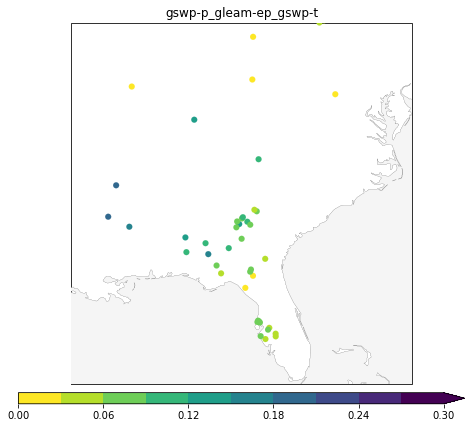

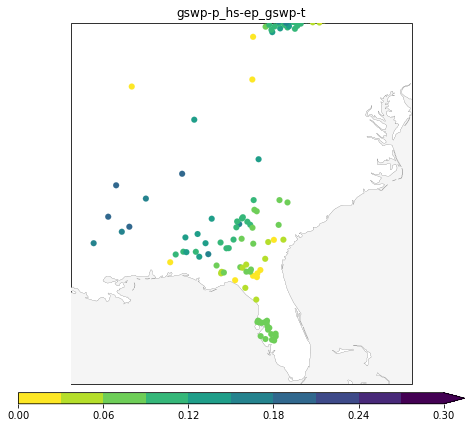

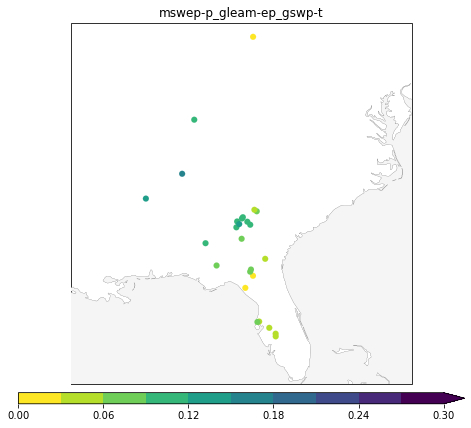

In [199]:
# data_sources = 'mswep-p_gleam-ep_gswp-t'
data_sources = 'gswp-p_gleam-ep_gswp-t'
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon','q_mean']]
df = df.dropna()

cmap = cm.get_cmap('viridis_r')
bounds = np.linspace(0,0.3,11)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig2 = plt.figure(figsize=(8,8))
ax4 = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax4.coastlines(linewidth=0.1)
ax4.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax4.set_global()
ax4.set_ylim(lat_min,lat_max)
ax4.set_xlim(lon_min,lon_max)
ax4.set_title(f'{data_sources}')
s=ax4.scatter(df.lon,df.lat,c=df['asi'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap,norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)

data_sources = 'gswp-p_hs-ep_gswp-t'
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon','q_mean']]
df = df.dropna()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig2 = plt.figure(figsize=(8,8))
ax4 = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax4.coastlines(linewidth=0.1)
ax4.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax4.set_global()
ax4.set_ylim(lat_min,lat_max)
ax4.set_xlim(lon_min,lon_max)
ax4.set_title(f'{data_sources}')
s=ax4.scatter(df.lon,df.lat,c=df['asi'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap,norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)

data_sources = 'mswep-p_gleam-ep_gswp-t'
# data_sources = 'gswp-p_gleam-ep_gswp-t'
df = pd.read_csv(f'{work_dir}/output/catchment_characteristics/master_characteristics_{data_sources}.csv',index_col=0)
df = df[df.p_mean-df.q_mean < df.ep_mean]
df = df[['p_mean','ep_mean', 't_mean','tdiff_mean','idu_mean', 'si_ep','si_p', 'asi','dtb','ia','slp_mean','el_mean','tc','ntc','nonveg','pclay','psand','lai_mean','lai_rsd','sc_mean','sc_rsd','sr_20','lat','lon','q_mean']]
df = df.dropna()
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig2 = plt.figure(figsize=(8,8))
ax4 = fig2.add_subplot(111,projection=ccrs.PlateCarree())
ax4.coastlines(linewidth=0.1)
ax4.add_feature(cartopy.feature.OCEAN, zorder=100,facecolor='whitesmoke', edgecolor='k',linewidth=0.1)
ax4.set_global()
ax4.set_ylim(lat_min,lat_max)
ax4.set_xlim(lon_min,lon_max)
ax4.set_title(f'{data_sources}')
s=ax4.scatter(df.lon,df.lat,c=df['asi'],edgecolors='face',marker='o',linewidths=0.1,cmap=cmap,norm=norm,zorder=102)
cbar = plt.colorbar(s, orientation='horizontal',spacing='proportional',extend='max', pad=0.02,aspect=40,norm=norm)

